### Импорт библиотек

In [1]:
import os
import sqlite3
import pandas as pd

In [2]:
project_dir_path = os.environ["NIR_1_sem_magistracy"]

In [3]:
import sys

lib_dir = 'lib'
lib_dir_path = os.path.join(project_dir_path, lib_dir)
sys.path.append(lib_dir_path)
import nn_train.tools as tools
from nn_train.tools import pa_fields, seven_fields, fields
from nn_train.neural_network import NeuralNetwork

### Сбор всех данных в единый df ('Aleksashina_Керов_Андрей.db' + 'other.db')

In [4]:
data_dir = 'Data'
db_dir = 'databases'
db_dir_path = os.path.join(project_dir_path, data_dir, db_dir)

In [5]:
databases = list(os.walk(db_dir_path))[0]
databases

('/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Data/databases',
 [],
 ['Aleksashina_Керов_Андрей.db', 'train.db', 'clear_emotions.db', 'other.db'])

In [6]:
df = pd.DataFrame()
for db_file in databases[2]:
    if db_file in ['train.db', 'clear_emotions.db']:
        continue
    db_path = os.path.join(db_dir_path, db_file)
    name_db = db_file[:-3]
    connection = sqlite3.connect(db_path)
    df_2 = pd.read_sql(f'select * from {name_db}', con=connection)
    df = pd.concat([df, df_2], axis=0)
df

Index_    Video_Time    Neutral        Happy  \
0         00:00:00.000_Керов Андрей_3  00:00:00.000  0.9878594  0.003336495   
1         00:00:00.030_Керов Андрей_3  00:00:00.030  0.9878824  0.003385304   
2         00:00:00.060_Керов Андрей_3  00:00:00.060  0.9879055  0.003434114   
3         00:00:00.090_Керов Андрей_3  00:00:00.090  0.9879286  0.003482923   
4         00:00:00.121_Керов Андрей_3  00:00:00.121  0.9880258  0.003506238   
...                               ...           ...        ...          ...   
20842  00:01:51.700_Куликов Алексей_1  00:01:51.700  0.9315634   3.7894e-05   
20843  00:01:51.800_Куликов Алексей_1  00:01:51.800  0.9356429   3.1707e-05   
20844  00:01:51.900_Куликов Алексей_1  00:01:51.900  0.9384109   2.6894e-05   
20845  00:01:52.000_Куликов Алексей_1  00:01:52.000  0.9407817   2.3125e-05   
20846  00:01:52.100_Куликов Алексей_1  00:01:52.100  0.9421062   2.0179e-05   

               Sad        Angry    Surprised       Scared    Disgusted  \
0      0.008397053  0.001824096  0.007600656   6.9452e-05  0.000141165   
1      0.008362157  0.001782566  0.007644675   8.0761e-05  0.000138702   
2      0.008327262  0.001741036  0.007688694    9.207e-05   0.00013624   
3      0.008292366  0.001699506  0.007732714  0.000103379  0.000133777   
4      0.008183754   0.00164466   0.00778434  0.000113112  0.000130297   
...            ...          ...          ...          ...          ...   
20842   0.02397099   0.06796286   0.02635098  0.000250268  0.000691861   
20843    0.0237766   0.06259692   0.02374056  0.000229404  0.000798602   
20844     0.023437   0.05935737   0.02117987  0.000212627  0.000848645   
20845   0.02303489   0.05651735   0.01901644  0.000197417  0.000877875   
20846   0.02311718    0.0544879   0.01772361  0.000184181  0.000897447   

            Valence  ... Action_Unit_12___Right___Lip_Corner_Puller  \
0      -0.005060558  ...                                        0.0   
1      -0.004976853  ...                                        0.0   
2      -0.004893148  ...                                        0.0   
3      -0.004809443  ...                                        0.0   
4      -0.004677515  ...                                        0.0   
...             ...  ...                                        ...   
20842   -0.06792496  ...                                        0.0   
20843   -0.06256521  ...                                        0.0   
20844   -0.05933048  ...                                        0.0   
20845   -0.05649422  ...                                        0.0   
20846   -0.05446772  ...                                        0.0   

      Action_Unit_14___Right___Dimpler  \
0                                  0.0   
1                                  0.0   
2                                  0.0   
3                                  0.0   
4                                  0.0   
...                                ...   
20842                              0.0   
20843                              0.0   
20844                              0.0   
20845                              0.0   
20846                              0.0   

      Action_Unit_15___Right___Lip_Corner_Depressor  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   
...                                             ...   
20842                                           0.0   
20843                                           0.0   
20844                                           0.0   
20845                                           0.0   
20846                                           0.0   

      Action_Unit_20___Right___Lip_Stretcher  \
0                                        0.0   
1                                        0.0   
2                             

### Изменение index'а в df

In [7]:
tools.make_valid_df(df, fields)

In [8]:
df

Index_    Video_Time  \
Index_                                                                         
00:00:00.000_Керов Андрей_3        00:00:00.000_Керов Андрей_3  00:00:00.000   
00:00:00.030_Керов Андрей_3        00:00:00.030_Керов Андрей_3  00:00:00.030   
00:00:00.060_Керов Андрей_3        00:00:00.060_Керов Андрей_3  00:00:00.060   
00:00:00.090_Керов Андрей_3        00:00:00.090_Керов Андрей_3  00:00:00.090   
00:00:00.121_Керов Андрей_3        00:00:00.121_Керов Андрей_3  00:00:00.121   
...                                                        ...           ...   
00:01:51.700_Куликов Алексей_1  00:01:51.700_Куликов Алексей_1  00:01:51.700   
00:01:51.800_Куликов Алексей_1  00:01:51.800_Куликов Алексей_1  00:01:51.800   
00:01:51.900_Куликов Алексей_1  00:01:51.900_Куликов Алексей_1  00:01:51.900   
00:01:52.000_Куликов Алексей_1  00:01:52.000_Куликов Алексей_1  00:01:52.000   
00:01:52.100_Куликов Алексей_1  00:01:52.100_Куликов Алексей_1  00:01:52.100   

                                 Neutral     Happy       Sad     Angry  \
Index_                                                                   
00:00:00.000_Керов Андрей_3     0.987859  0.003336  0.008397  0.001824   
00:00:00.030_Керов Андрей_3     0.987882  0.003385  0.008362  0.001783   
00:00:00.060_Керов Андрей_3     0.987905  0.003434  0.008327  0.001741   
00:00:00.090_Керов Андрей_3     0.987929  0.003483  0.008292  0.001700   
00:00:00.121_Керов Андрей_3     0.988026  0.003506  0.008184  0.001645   
...                                  ...       ...       ...       ...   
00:01:51.700_Куликов Алексей_1  0.931563  0.000038  0.023971  0.067963   
00:01:51.800_Куликов Алексей_1  0.935643  0.000032  0.023777  0.062597   
00:01:51.900_Куликов Алексей_1  0.938411  0.000027  0.023437  0.059357   
00:01:52.000_Куликов Алексей_1  0.940782  0.000023  0.023035  0.056517   
00:01:52.100_Куликов Алексей_1  0.942106  0.000020  0.023117  0.054488   

                                Surprised    Scared  Disgusted   Valence  ...  \
Index_                                                                    ...   
00:00:00.000_Керов Андрей_3      0.007601  0.000069   0.000141 -0.005061  ...   
00:00:00.030_Керов Андрей_3      0.007645  0.000081   0.000139 -0.004977  ...   
00:00:00.060_Керов Андрей_3      0.007689  0.000092   0.000136 -0.004893  ...   
00:00:00.090_Керов Андрей_3      0.007733  0.000103   0.000134 -0.004809  ...   
00:00:00.121_Керов Андрей_3      0.007784  0.000113   0.000130 -0.004678  ...   
...                                   ...       ...        ...       ...  ...   
00:01:51.700_Куликов Алексей_1   0.026351  0.000250   0.000692 -0.067925  ...   
00:01:51.800_Куликов Алексей_1   0.023741  0.000229   0.000799 -0.062565  ...   
00:01:51.900_Куликов Алексей_1   0.021180  0.000213   0.000849 -0.059330  ...   
00:01:52.000_Куликов Алексей_1   0.019016  0.000197   0.000878 -0.056494  ...   
00:01:52.100_Куликов Алексей_1   0.017724  0.000184   0.000897 -0.054468  ...   

                                Action_Unit_12___Right___Lip_Corner_Puller  \
Index_                                                                       
00:00:00.000_Керов Андрей_3                                            0.0   
00:00:00.030_Керов Андрей_3                                            0.0   
00:00:00.060_Керов Андрей_3                                            0.0   
00:00:00.090_Керов Андрей_3                                            0.0   
00:00:00.121_Керов Андрей_3                                            0.0   
...                                                                    ...   
00:01:51.700_Куликов Алексей_1                                         0.0   
00:01:51.800_Куликов Алексей_1                                         0.0   
00:01:51.900_Куликов Алексей_1                                         0.0   
00:01:52.000_Куликов Алексей_1                                         0.0   
00:01:52.100_Куликов Алексей_1                                

In [9]:
# df_train_, df_other = tools.groupby(df, other=True)
# df_train_

### Сбор всех clear эмоций в единый df_clear ('clear_emotions.db')

In [10]:
name_db = 'clear_emotions'
db_path = os.path.join(db_dir_path, f'{name_db}.db')
connection = sqlite3.connect(db_path)
df_clear = pd.read_sql(f'select * from {name_db}', con=connection)
tools.make_valid_df(df_clear, fields)
df_clear = df_clear[fields]
df_clear

Neutral  Happy   Sad  Angry  Surprised  \
Index_                                                                    
00:00:01.300_Смолин Александр_1     0.97   0.00  0.02   0.03       0.01   
00:00:07.575_Керов Андрей_8         0.97   0.01  0.00   0.00       0.04   
00:00:03.000_Боим_9                 0.97   0.01  0.00   0.00       0.04   
00:00:05.700_Provotorov_3           0.97   0.00  0.02   0.03       0.01   
00:00:09.848_Korsakov_9             0.97   0.00  0.00   0.01       0.01   
...                                  ...    ...   ...    ...        ...   
00:00:07.700_Nasyrov_7              0.01   0.00  0.00   0.01       0.00   
00:00:08.200_Nasyrov_7              0.01   0.00  0.00   0.01       0.00   
00:00:07.300_Nasyrov_7              0.01   0.00  0.00   0.00       0.00   
00:00:08.900_Nasyrov_7              0.00   0.00  0.00   0.01       0.00   
00:00:09.100_Nasyrov_7              0.00   0.00  0.00   0.01       0.00   

                                 Scared  Disgusted  Valence  Arousal  
Index_                                                                
00:00:01.300_Смолин Александр_1     0.0       0.01    -0.03     0.23  
00:00:07.575_Керов Андрей_8         0.0       0.00     0.01     0.31  
00:00:03.000_Боим_9                 0.0       0.00     0.01     0.31  
00:00:05.700_Provotorov_3           0.0       0.01    -0.03     0.23  
00:00:09.848_Korsakov_9             0.0       0.01    -0.01     0.30  
...                                 ...        ...      ...      ...  
00:00:07.700_Nasyrov_7              0.0       0.99    -0.99     0.63  
00:00:08.200_Nasyrov_7              0.0       0.99    -0.99     0.63  
00:00:07.300_Nasyrov_7              0.0       0.99    -0.99     0.62  
00:00:08.900_Nasyrov_7              0.0       1.00    -1.00     0.63  
00:00:09.100_Nasyrov_7              0.0       1.00    -1.00     0.63  

[530 rows x 9 columns]

In [11]:
nn = NeuralNetwork(df[pa_fields], df[seven_fields])

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))


In [12]:
df_metrics = pd.DataFrame(columns = ['model', 'layer', 'N'] + tools.metrics)
df_metrics

Empty DataFrame
Columns: [model, layer, N, mean, norm, stat]
Index: []

In [13]:
models = []

In [15]:
# def removeprefix(text, prefix):
#     if text.startswith(prefix):
#         return text[len(prefix):]
#     return text

In [19]:
# removeprefix('model_third_6.7.5_2', 'model_third_')

In [20]:
# removeprefix('7.2.7_3', 'model_third_')

'7.2.7_3'

In [21]:
# '7.2.7_3'.split('_')

['7.2.7', '3']

In [22]:
# '7.2.7'.split('_')

['7.2.7']

### Загрузка всех 288 моделей // layer = 'third' ; v = 1

In [43]:
# v = 1
# layer = 'third'
# dir_path = f'../saved_models/{layer}/_{v}'
# models = [el for el in list(os.walk('..')) if dir_path in el[0]][0][1]
# models

['model_third_6.8.5',
 'model_third_9.8.5',
 'model_third_8.2.3',
 'model_third_7.9.9',
 'model_third_9.10.5',
 'model_third_9.7.7',
 'model_third_9.10.3',
 'model_third_8.8.5',
 'model_third_8.3.3',
 'model_third_7.6.3',
 'model_third_9.2.6',
 'model_third_9.3.6',
 'model_third_7.6.8',
 'model_third_6.10.7',
 'model_third_9.2.3',
 'model_third_9.6.9',
 'model_third_7.7.6',
 'model_third_9.7.3',
 'model_third_9.3.4',
 'model_third_8.9.8',
 'model_third_9.4.6',
 'model_third_9.2.4',
 'model_third_6.10.9',
 'model_third_9.3.5',
 'model_third_7.3.5',
 'model_third_6.6.7',
 'model_third_7.8.7',
 'model_third_7.10.6',
 'model_third_7.8.3',
 'model_third_9.5.4',
 'model_third_6.8.8',
 'model_third_9.5.9',
 'model_third_7.3.6',
 'model_third_9.2.7',
 'model_third_7.2.8',
 'model_third_9.2.9',
 'model_third_9.6.2',
 'model_third_7.2.2',
 'model_third_9.3.9',
 'model_third_8.4.5',
 'model_third_7.10.8',
 'model_third_7.2.6',
 'model_third_7.3.7',
 'model_third_8.8.4',
 'model_third_7.9.3',
 'mo

In [ ]:
# for i in range(len(models)):
#     model_layers_v = removeprefix(models[i], 'model_third_')
#     N = model_layers_v.split('_')[0]
#     path = os.path.join(dir_path, models[i])
#     model = load_model(path)
#     nn = NeuralNetwork(df[pa_fields], df[seven_fields], )
#     models[i] = [model_name, N, nn]

In [78]:
# def load_models(path_to_saved_models, df, layer='first', v=1):
#     dir_path = os.path.join(path_to_saved_models, layer, f'_{v}')
#     models = [el for el in list(os.walk('..')) if dir_path in el[0]][0][1]
#     for i in range(len(models)):
#         model_layers_v = removeprefix(models[i], f'model_{layer}_')
#         N = model_layers_v.split('_')[0]
#         path = os.path.join(dir_path, models[i])
#         model = load_model(path)
#         nn = NeuralNetwork(df[pa_fields], df[seven_fields], model)
#         models[i] = [model_layers_v, N, nn]
    
#     models.sort(key=lambda x: list(map(int, x[1].split('.'))))
    
#     return models

In [14]:
dir_model = 'saved_models'
path_to_saved_models = os.path.join(project_dir_path, dir_model)
path_to_saved_models

'/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/saved_models'

In [15]:
layer = 'third'
v = 1
models = tools.load_models(path_to_saved_models, df, layer=layer, v=v)
models

2024-03-17 17:18:44.000953: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-03-17 17:18:44.001028: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-03-17 17:18:44.001629: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Ivan-PC): /proc/driver/nvidia/version does not exist
2024-03-17 17:18:44.003101: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 


/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

[['6.2.2', '6.2.2', <nn_train.neural_network.NeuralNetwork at 0x7f8719269040>],
 ['6.2.3', '6.2.3', <nn_train.neural_network.NeuralNetwork at 0x7f87148dbac0>],
 ['6.2.4', '6.2.4', <nn_train.neural_network.NeuralNetwork at 0x7f8722401730>],
 ['6.2.5', '6.2.5', <nn_train.neural_network.NeuralNetwork at 0x7f872021b6a0>],
 ['6.2.6', '6.2.6', <nn_train.neural_network.NeuralNetwork at 0x7f871a152250>],
 ['6.2.7', '6.2.7', <nn_train.neural_network.NeuralNetwork at 0x7f8714e6c910>],
 ['6.2.8', '6.2.8', <nn_train.neural_network.NeuralNetwork at 0x7f87183b9370>],
 ['6.2.9', '6.2.9', <nn_train.neural_network.NeuralNetwork at 0x7f87235f3490>],
 ['6.3.2', '6.3.2', <nn_train.neural_network.NeuralNetwork at 0x7f871704b9d0>],
 ['6.3.3', '6.3.3', <nn_train.neural_network.NeuralNetwork at 0x7f871467aeb0>],
 ['6.3.4', '6.3.4', <nn_train.neural_network.NeuralNetwork at 0x7f871bb68ac0>],
 ['6.3.5', '6.3.5', <nn_train.neural_network.NeuralNetwork at 0x7f87108809d0>],
 ['6.3.6', '6.3.6', <nn_train.neural_net

In [ ]:
# v = 1
# i = 0
# dir_path = f'../saved_models/third/_{v}'
# path = os.path.join(dir_path, seven_models_[i] + f'_{v}')
# model = load_model(path)
# print(seven_models_[i])

In [2]:
# v = 5
# i = 0
# seven_models_ = ['7.9.8', '7.10.9', '8.9.8', '8.10.8', '8.10.9', '9.6.7', '9.6.8']
# dir_path = f'../saved_models/third/_{v}'
# path = os.path.join(dir_path, seven_models_[i] + f'_{v}')
# model = load_model(path)
# print(seven_models_[i])

7.9.8


### Вычисление df_metrics с помощью tools.create_df_metrics 

In [15]:
df_metrics = pd.DataFrame(columns = ['model', 'layer', 'N'] + tools.metrics)
df_metrics

Empty DataFrame
Columns: [model, layer, N, mean, norm, stat]
Index: []

In [16]:
metrics = tools.metrics

In [17]:
# def create_df_metrics(models, test, df_metrics, layer='first'):
#     for model_list in models:
#         entry_dict = {'model': model_list[0], 'layer': layer, 'N': model_list[1]}
#         entry_dict.update({metric: model_list[2].model_metric(test, metric) for metric in metrics})
#         df_metrics = df_metrics.append(entry_dict, ignore_index = True)
#     return df_metrics

In [18]:
test = nn.get_test()
test

Neutral     Happy       Sad     Angry  \
Index_                                                                   
00:00:00.000_Керов Андрей_3     0.987859  0.003336  0.008397  0.001824   
00:00:00.030_Керов Андрей_3     0.987882  0.003385  0.008362  0.001783   
00:00:00.060_Керов Андрей_3     0.987905  0.003434  0.008327  0.001741   
00:00:00.090_Керов Андрей_3     0.987929  0.003483  0.008292  0.001700   
00:00:00.121_Керов Андрей_3     0.988026  0.003506  0.008184  0.001645   
...                                  ...       ...       ...       ...   
00:01:51.700_Куликов Алексей_1  0.931563  0.000038  0.023971  0.067963   
00:01:51.800_Куликов Алексей_1  0.935643  0.000032  0.023777  0.062597   
00:01:51.900_Куликов Алексей_1  0.938411  0.000027  0.023437  0.059357   
00:01:52.000_Куликов Алексей_1  0.940782  0.000023  0.023035  0.056517   
00:01:52.100_Куликов Алексей_1  0.942106  0.000020  0.023117  0.054488   

                                Surprised    Scared  Disgusted   Valence  \
Index_                                                                     
00:00:00.000_Керов Андрей_3      0.007601  0.000069   0.000141 -0.005061   
00:00:00.030_Керов Андрей_3      0.007645  0.000081   0.000139 -0.004977   
00:00:00.060_Керов Андрей_3      0.007689  0.000092   0.000136 -0.004893   
00:00:00.090_Керов Андрей_3      0.007733  0.000103   0.000134 -0.004809   
00:00:00.121_Керов Андрей_3      0.007784  0.000113   0.000130 -0.004678   
...                                   ...       ...        ...       ...   
00:01:51.700_Куликов Алексей_1   0.026351  0.000250   0.000692 -0.067925   
00:01:51.800_Куликов Алексей_1   0.023741  0.000229   0.000799 -0.062565   
00:01:51.900_Куликов Алексей_1   0.021180  0.000213   0.000849 -0.059330   
00:01:52.000_Куликов Алексей_1   0.019016  0.000197   0.000878 -0.056494   
00:01:52.100_Куликов Алексей_1   0.017724  0.000184   0.000897 -0.054468   

                                 Arousal  
Index_                                    
00:00:00.000_Керов Андрей_3     0.247500  
00:00:00.030_Керов Андрей_3     0.247500  
00:00:00.060_Керов Андрей_3     0.247500  
00:00:00.090_Керов Андрей_3     0.247500  
00:00:00.121_Керов Андрей_3     0.247500  
...                                  ...  
00:01:51.700_Куликов Алексей_1  0.287489  
00:01:51.800_Куликов Алексей_1  0.287139  
00:01:51.900_Куликов Алексей_1  0.286695  
00:01:52.000_Куликов Алексей_1  0.286170  
00:01:52.100_Куликов Алексей_1  0.285693  

[25321 rows x 9 columns]

In [21]:
layer

'third'

In [22]:
models

[['6.2.2', '6.2.2', <nn_train.neural_network.NeuralNetwork at 0x7f8719269040>],
 ['6.2.3', '6.2.3', <nn_train.neural_network.NeuralNetwork at 0x7f87148dbac0>],
 ['6.2.4', '6.2.4', <nn_train.neural_network.NeuralNetwork at 0x7f8722401730>],
 ['6.2.5', '6.2.5', <nn_train.neural_network.NeuralNetwork at 0x7f872021b6a0>],
 ['6.2.6', '6.2.6', <nn_train.neural_network.NeuralNetwork at 0x7f871a152250>],
 ['6.2.7', '6.2.7', <nn_train.neural_network.NeuralNetwork at 0x7f8714e6c910>],
 ['6.2.8', '6.2.8', <nn_train.neural_network.NeuralNetwork at 0x7f87183b9370>],
 ['6.2.9', '6.2.9', <nn_train.neural_network.NeuralNetwork at 0x7f87235f3490>],
 ['6.3.2', '6.3.2', <nn_train.neural_network.NeuralNetwork at 0x7f871704b9d0>],
 ['6.3.3', '6.3.3', <nn_train.neural_network.NeuralNetwork at 0x7f871467aeb0>],
 ['6.3.4', '6.3.4', <nn_train.neural_network.NeuralNetwork at 0x7f871bb68ac0>],
 ['6.3.5', '6.3.5', <nn_train.neural_network.NeuralNetwork at 0x7f87108809d0>],
 ['6.3.6', '6.3.6', <nn_train.neural_net

In [21]:
df_metrics = tools.create_df_metrics(models, test, df_metrics, layer=layer)

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:237: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:237: FutureWarning: The frame.append method is dep

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:237: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:237: FutureWarning: The frame.append method is dep

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:237: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:237: FutureWarning: The frame.append method is dep

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:237: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:237: FutureWarning: The frame.append method is dep

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:237: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:237: FutureWarning: The frame.append method is dep

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:237: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:237: FutureWarning: The frame.append method is dep

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:237: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:237: FutureWarning: The frame.append method is dep

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:237: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:237: FutureWarning: The frame.append method is dep

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:237: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:237: FutureWarning: The frame.append method is dep

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:237: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:237: FutureWarning: The frame.append method is dep

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:237: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:237: FutureWarning: The frame.append method is dep

KeyboardInterrupt: 

In [26]:
df_metrics

model  layer       N      mean      norm      stat
0     6.2.2  third   6.2.2  0.137588  0.372505  0.462031
1     6.2.3  third   6.2.3  0.062971  0.175059  0.465435
2     6.2.4  third   6.2.4  0.071391  0.206440  0.492294
3     6.2.5  third   6.2.5  0.064195  0.172972  0.474699
4     6.2.6  third   6.2.6  0.058391  0.158985  0.468113
..      ...    ...     ...       ...       ...       ...
283  9.10.5  third  9.10.5  0.053820  0.147042  0.507153
284  9.10.6  third  9.10.6  0.052137  0.143601  0.506155
285  9.10.7  third  9.10.7  0.051378  0.141924  0.511227
286  9.10.8  third  9.10.8  0.051994  0.144095  0.503683
287  9.10.9  third  9.10.9  0.052117  0.142763  0.535004

[288 rows x 6 columns]

In [28]:
df_metrics.sort_values('mean')[:15]

model  layer       N      mean      norm      stat
254   9.6.8  third   9.6.8  0.050386  0.139357  0.572891
253   9.6.7  third   9.6.7  0.050416  0.139019  0.514882
214  8.10.8  third  8.10.8  0.050540  0.140494  0.533615
141  7.10.7  third  7.10.7  0.050636  0.140505  0.504504
143  7.10.9  third  7.10.9  0.050654  0.139693  0.541245
215  8.10.9  third  8.10.9  0.050880  0.140440  0.529089
71   6.10.9  third  6.10.9  0.050951  0.139834  0.498099
263   9.7.9  third   9.7.9  0.050955  0.141234  0.512682
206   8.9.8  third   8.9.8  0.051052  0.140405  0.528448
202   8.9.4  third   8.9.4  0.051154  0.141142  0.519538
133   7.9.7  third   7.9.7  0.051187  0.140624  0.520899
111   7.6.9  third   7.6.9  0.051270  0.141862  0.517106
167   8.4.9  third   8.4.9  0.051311  0.141488  0.510630
134   7.9.8  third   7.9.8  0.051319  0.141455  0.537480
285  9.10.7  third  9.10.7  0.051378  0.141924  0.511227

### Сохранение df_metrics с помощью tools.save_to_db

In [29]:
v

1

In [30]:
layer

'third'

In [31]:
dir_model

'saved_models'

In [32]:
name_db = 'df_metrics'
dir_metric = 'model_metrics'
path_dir_metric = os.path.join(project_dir_path, dir_metric, layer, f'_{v}')
db_path = os.path.join(path_dir_metric, f'{name_db}_{v}.db')
db_path

'/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/model_metrics/third/_1/df_metrics_1.db'

In [34]:
tools.save_to_db(db_path, name_db, df_metrics)

In [36]:
connection = sqlite3.connect(db_path)
pd.read_sql(f'select * from {name_db}', con=connection)

model  layer       N                mean               norm  \
0     6.2.2  third   6.2.2   0.137588111946182  0.372504504249433   
1     6.2.3  third   6.2.3  0.0629709893273934  0.175059110148287   
2     6.2.4  third   6.2.4  0.0713908746516161  0.206439730546283   
3     6.2.5  third   6.2.5  0.0641953191556134  0.172972058430538   
4     6.2.6  third   6.2.6  0.0583913929079195  0.158985445984666   
..      ...    ...     ...                 ...                ...   
283  9.10.5  third  9.10.5  0.0538203694473672   0.14704192892132   
284  9.10.6  third  9.10.6  0.0521365433459382   0.14360060549378   
285  9.10.7  third  9.10.7  0.0513782497023927  0.141923995187477   
286  9.10.8  third  9.10.8  0.0519940261682849  0.144094985574321   
287  9.10.9  third  9.10.9  0.0521168519865639  0.142762948981966   

                  stat  
0    0.462031185626984  
1    0.465435355901718  
2    0.492294490337372  
3    0.474698573350906  
4    0.468112796545029  
..                 ...  
283  0.507153332233429  
284  0.506155431270599  
285  0.511227428913116  
286   0.50368344783783  
287  0.535004019737244  

[288 rows x 6 columns]

### Вычисление df_clear_metrics и построение графиков с помощью tools.plot_emotions

In [37]:
df_clear_metrics = pd.DataFrame(columns = ['model'] + list(seven_fields) + ['clear'])
df_clear_metrics

Empty DataFrame
Columns: [model, Neutral, Happy, Sad, Angry, Surprised, Scared, Disgusted, clear]
Index: []

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method 

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method 

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method 

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method 

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method 

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method 

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method 

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method 

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method 

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method 

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method 

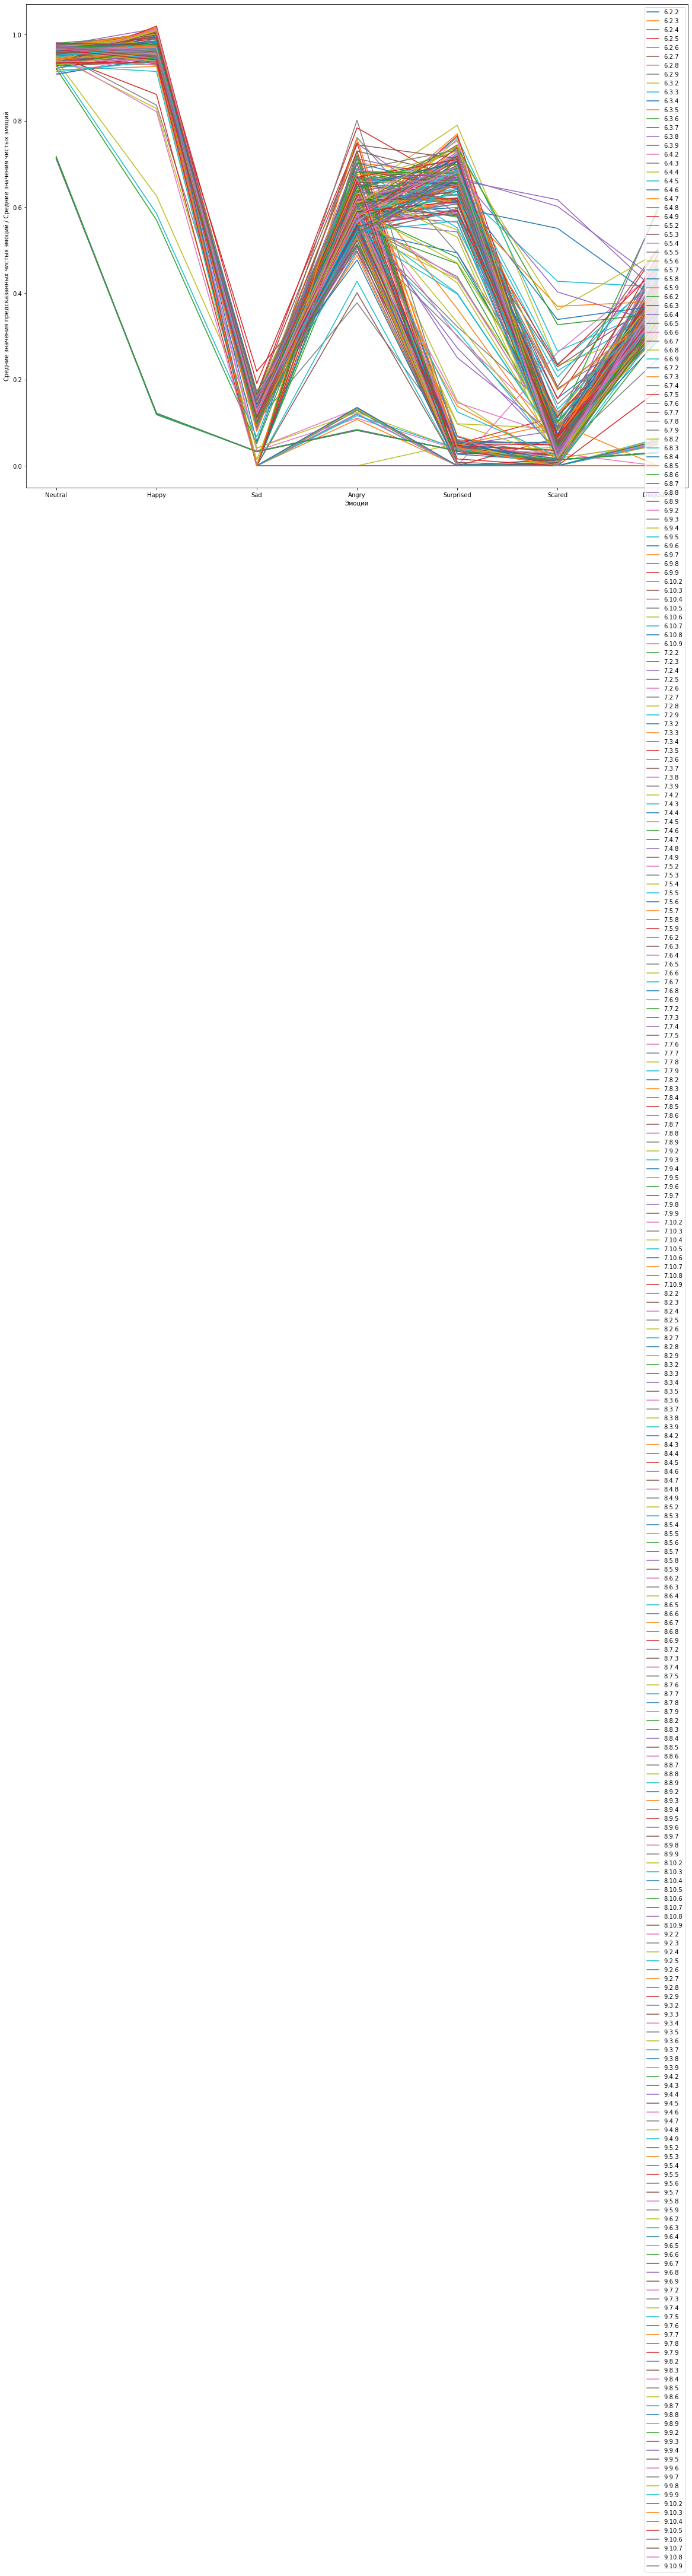

In [38]:
kwargs = {
    'models': models, 
    'df_clear': df_clear, 
    'df_clear_metrics': df_clear_metrics,
    'scale': True
}
df_clear_metrics = tools.plot_emotions(**kwargs)

In [39]:
df_clear_metrics.sort_values('clear')[-15:]

model   Neutral     Happy       Sad     Angry Surprised    Scared  \
253   9.6.7  0.979252   0.97717  0.103056  0.616549  0.619878  0.233867   
38    6.6.8  0.951271  0.962861   0.10906   0.63458  0.789953  0.233401   
134   7.9.8  0.969448  0.956497  0.116934  0.636971  0.670524     0.052   
287  9.10.9  0.971368  0.962634  0.156422  0.686818  0.732571  0.092375   
143  7.10.9  0.980029  0.964971  0.166464  0.783942  0.651393   0.11358   
119   7.7.9  0.959189  0.948123   0.13315  0.657978  0.675991  0.236064   
191   8.7.9  0.965289   1.00885  0.109195  0.632608   0.61247  0.369921   
190   8.7.8  0.965796  0.953088   0.11429  0.702935  0.642584  0.339347   
252   9.6.6  0.961854  0.950812  0.125664  0.637002  0.739231  0.327272   
214  8.10.8  0.972707  0.947852  0.105289  0.658362   0.68243   0.40317   
69   6.10.7  0.954235  0.969889  0.137798  0.607365  0.647867   0.42804   
140  7.10.6  0.969573  0.967227  0.136874  0.586114  0.598957   0.55079   
198   8.8.8  0.949469  0.951028   0.16754  0.661864  0.729771  0.361251   
204   8.9.6  0.974497  0.965766  0.120583  0.619573  0.670363  0.601758   
254   9.6.8  0.967275  0.971018  0.120655  0.712193  0.663387  0.617285   

    Disgusted     clear  
253  0.458981  0.569822  
38   0.317892  0.571288  
134  0.598435  0.571544  
287  0.435251  0.576777  
143  0.377155  0.576791  
119  0.433681   0.57774  
191  0.381376  0.582816  
190  0.371662  0.584243  
252  0.353263  0.585014  
214  0.331405  0.585888  
69    0.41471  0.594272  
140  0.384007  0.599077  
198   0.49516  0.616583  
204  0.428669  0.625887  
254  0.401015  0.636118

In [40]:
df_clear_metrics[df_clear_metrics.model == '7.10.9']

model   Neutral     Happy       Sad     Angry Surprised   Scared  \
143  7.10.9  0.980029  0.964971  0.166464  0.783942  0.651393  0.11358   

    Disgusted     clear  
143  0.377155  0.576791

In [41]:
df_clear_metrics

model   Neutral     Happy       Sad     Angry Surprised    Scared  \
0     6.2.2  0.715441  0.121323  0.033055  0.082387  0.034678  0.013991   
1     6.2.3  0.926011  1.000152  0.144992  0.488079       0.0  0.001509   
2     6.2.4  0.953215  0.972401       0.0  0.128289  0.000002   0.00001   
3     6.2.5  0.940826  0.962519  0.112698  0.663909  0.040667  0.022834   
4     6.2.6  0.964983  0.960879  0.122025  0.585265  0.046913  0.082137   
..      ...       ...       ...       ...       ...       ...       ...   
283  9.10.5   0.96582  0.941238  0.110615  0.589198  0.613017  0.065501   
284  9.10.6  0.974131  0.958857  0.130428  0.534498   0.67028  0.028919   
285  9.10.7  0.972031  0.947156   0.11408  0.608389  0.636377  0.051461   
286  9.10.8  0.966055  0.969861  0.128266  0.580584   0.69449  0.020572   
287  9.10.9  0.971368  0.962634  0.156422  0.686818  0.732571  0.092375   

    Disgusted     clear  
0      0.0309  0.147396  
1    0.394041  0.422112  
2         0.0  0.293417  
3     0.44671  0.455737  
4    0.370479  0.447526  
..        ...       ...  
283  0.358925  0.520616  
284  0.390838   0.52685  
285  0.320108  0.521372  
286  0.389817  0.535663  
287  0.435251  0.576777  

[288 rows x 9 columns]

### Сохранение df_clear_metrics с помощью tools.save_to_db

In [30]:
name_db = 'df_clear_metrics'
dir_metric = 'model_metrics'
path_dir_metric = os.path.join(project_dir_path, dir_metric, layer, f'_{v}')
db_path = os.path.join(path_dir_metric, f'{name_db}_{v}.db')
db_path

'/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/model_metrics/third/_1/df_clear_metrics_1.db'

In [32]:
tools.save_to_db(db_path, name_db, df_clear_metrics)

In [33]:
connection = sqlite3.connect(db_path)
pd.read_sql(f'select * from {name_db}', con=connection)

model            Neutral              Happy                  Sad  \
0     6.2.2  0.715440731920693  0.121322880616575   0.0330548656723579   
1     6.2.3  0.926011325048169   1.00015186257261    0.144991687190514   
2     6.2.4  0.953215084457475  0.972401227727907  1.7672025139251e-09   
3     6.2.5  0.940825737697977  0.962518626429334    0.112698262589858   
4     6.2.6  0.964983321375009   0.96087920543221    0.122025483856111   
..      ...                ...                ...                  ...   
283  9.10.5  0.965819599239601  0.941238152024106    0.110615191246175   
284  9.10.6  0.974130851927035  0.958857039979842     0.13042821441135   
285  9.10.7  0.972031366827537  0.947156190715784    0.114079584882679   
286  9.10.8  0.966055146478395  0.969861024530821    0.128265763094233   
287  9.10.9  0.971367795215769  0.962634042814527    0.156422436426256   

                  Angry             Surprised                Scared  \
0    0.0823874178678319    0.0346779585133169    0.0139913138221292   
1     0.488079311967314  1.10642362077903e-07   0.00150924418395495   
2     0.128288556285889  1.96596772125642e-06  1.04295975011066e-05   
3     0.663909144273578    0.0406670448181942    0.0228335076541293   
4     0.585265103966659    0.0469132266353617    0.0821373334117964   
..                  ...                   ...                   ...   
283   0.589197970048689     0.613016664691896    0.0655011000002132   
284   0.534497603791458      0.67027962149805    0.0289192678881627   
285   0.608389497220586     0.636377170568046    0.0514611492262167   
286   0.580584137692891     0.694489586759227    0.0205715588640933   
287   0.686818465607865     0.732570928032818     0.092375358822299   

                Disgusted              clear  
0      0.0308998010671922  0.147396424211442  
1       0.394040619618453  0.422112023031911  
2    1.27854378225835e-07  0.293416770522582  
3       0.446709589615107  0.455737416154025  
4       0.370478636281209  0.447526044422622  
..                    ...                ...  
283     0.358925093202323  0.520616252921858  
284     0.390838377169946  0.526850139523692  
285     0.320107521677664   0.52137178301693  
286     0.389816831871168  0.535663435612975  
287     0.435250954036295  0.576777140136547  

[288 rows x 9 columns]

In [34]:
dir_model = 'saved_models'
path_to_saved_models = os.path.join(project_dir_path, dir_model)
path_to_saved_models

'/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/saved_models'

### По аналогии для других v (2-5)

### Загрузка всех 288 моделей // layer = 'third' ; v = 2

In [14]:
layer = 'third'
v = 2
models_2 = tools.load_models(path_to_saved_models, df, layer=layer, v=v)
models_2

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Test/../nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Test/../nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))


[['6.2.2_2',
  '6.2.2',
 ['6.2.3_2',
  '6.2.3',
 ['6.2.4_2',
  '6.2.4',
 ['6.2.5_2',
  '6.2.5',
 ['6.2.8_2',
  '6.2.8',
 ['6.2.9_2',
  '6.2.9',
 ['6.3.3_2',
  '6.3.3',
 ['6.3.4_2',
  '6.3.4',
 ['6.3.8_2',
  '6.3.8',
 ['6.4.3_2',
  '6.4.3',
 ['6.4.4_2',
  '6.4.4',
 ['6.4.8_2',
  '6.4.8',
 ['6.4.9_2',
  '6.4.9',
 ['6.5.2_2',
  '6.5.2',
 ['6.5.5_2',
  '6.5.5',
 ['6.5.6_2',
  '6.5.6',
 ['6.5.7_2',
  '6.5.7',
 ['6.5.8_2',
  '6.5.8',
 ['6.5.9_2',
  '6.5.9',
 ['6.6.3_2',
  '6.6.3',
 ['6.6.5_2',
  '6.6.5',
 ['6.6.6_2',
  '6.6.6',
 ['6.6.7_2',
  '6.6.7',
 ['6.7.3_2',
  '6.7.3',
 ['6.7.4_2',
  '6.7.4',
 ['6.7.5_2',
  '6.7.5',
 ['6.7.9_2',
  '6.7.9',
 ['6.8.3_2',
  '6.8.3',
 ['6.8.6_2',
  '6.8.6',
 ['6.8.7_2',
  '6.8.7',
 ['6.8.8_2',
  '6.8.8',
 ['6.8.9_2',
  '6.8.9',
 ['6.9.2_2',
  '6.9.2',
 ['6.9.3_2',
  '6.9.3',
 ['6.9.4_2',
  '6.9.4',
 ['6.9.7_2',
  '6.9.7',
 ['6.9.8_2',
  '6.9.8',
 ['6.10.2_2',
  '6.10.2',
 ['6.10.3_2',
  '6.10.3',
 ['6.10.5_2',
  '6.10.5',
 ['6.10.6_2',
  '6.10.6',
 ['6.10.

### Вычисление df_metrics с помощью tools.create_df_metrics 

In [36]:
df_metrics_2 = pd.DataFrame(columns = ['model', 'layer', 'N'] + tools.metrics)
df_metrics_2

Empty DataFrame
Columns: [model, layer, N, mean, norm, stat]
Index: []

In [37]:
layer

'third'

In [38]:
test = nn.get_test()
test

Neutral     Happy       Sad     Angry  \
Index_                                                                   
00:00:00.000_Керов Андрей_3     0.987859  0.003336  0.008397  0.001824   
00:00:00.030_Керов Андрей_3     0.987882  0.003385  0.008362  0.001783   
00:00:00.060_Керов Андрей_3     0.987905  0.003434  0.008327  0.001741   
00:00:00.090_Керов Андрей_3     0.987929  0.003483  0.008292  0.001700   
00:00:00.121_Керов Андрей_3     0.988026  0.003506  0.008184  0.001645   
...                                  ...       ...       ...       ...   
00:01:51.700_Куликов Алексей_1  0.931563  0.000038  0.023971  0.067963   
00:01:51.800_Куликов Алексей_1  0.935643  0.000032  0.023777  0.062597   
00:01:51.900_Куликов Алексей_1  0.938411  0.000027  0.023437  0.059357   
00:01:52.000_Куликов Алексей_1  0.940782  0.000023  0.023035  0.056517   
00:01:52.100_Куликов Алексей_1  0.942106  0.000020  0.023117  0.054488   

                                Surprised    Scared  Disgusted   Valence  \
Index_                                                                     
00:00:00.000_Керов Андрей_3      0.007601  0.000069   0.000141 -0.005061   
00:00:00.030_Керов Андрей_3      0.007645  0.000081   0.000139 -0.004977   
00:00:00.060_Керов Андрей_3      0.007689  0.000092   0.000136 -0.004893   
00:00:00.090_Керов Андрей_3      0.007733  0.000103   0.000134 -0.004809   
00:00:00.121_Керов Андрей_3      0.007784  0.000113   0.000130 -0.004678   
...                                   ...       ...        ...       ...   
00:01:51.700_Куликов Алексей_1   0.026351  0.000250   0.000692 -0.067925   
00:01:51.800_Куликов Алексей_1   0.023741  0.000229   0.000799 -0.062565   
00:01:51.900_Куликов Алексей_1   0.021180  0.000213   0.000849 -0.059330   
00:01:52.000_Куликов Алексей_1   0.019016  0.000197   0.000878 -0.056494   
00:01:52.100_Куликов Алексей_1   0.017724  0.000184   0.000897 -0.054468   

                                 Arousal  
Index_                                    
00:00:00.000_Керов Андрей_3     0.247500  
00:00:00.030_Керов Андрей_3     0.247500  
00:00:00.060_Керов Андрей_3     0.247500  
00:00:00.090_Керов Андрей_3     0.247500  
00:00:00.121_Керов Андрей_3     0.247500  
...                                  ...  
00:01:51.700_Куликов Алексей_1  0.287489  
00:01:51.800_Куликов Алексей_1  0.287139  
00:01:51.900_Куликов Алексей_1  0.286695  
00:01:52.000_Куликов Алексей_1  0.286170  
00:01:52.100_Куликов Алексей_1  0.285693  

[25321 rows x 9 columns]

In [20]:
df_metrics_2 = tools.create_df_metrics(models_2, test, df_metrics_2, layer=layer)
df_metrics_2

model  layer       N      mean      norm      stat
0     6.2.2_2  third   6.2.2  0.169141  0.450900  0.462031
1     6.2.3_2  third   6.2.3  0.079602  0.225136  0.445875
2     6.2.4_2  third   6.2.4  0.092022  0.265427  0.458662
3     6.2.5_2  third   6.2.5  0.088186  0.234775  0.451269
4     6.2.8_2  third   6.2.8  0.169853  0.452297  0.462031
..        ...    ...     ...       ...       ...       ...
108   9.9.8_2  third   9.9.8  0.075114  0.212436  0.479150
109  9.10.6_2  third  9.10.6  0.087379  0.236245  0.491315
110  9.10.7_2  third  9.10.7  0.083133  0.224627  0.497255
111  9.10.8_2  third  9.10.8  0.069871  0.192484  0.493836
112  9.10.9_2  third  9.10.9  0.075136  0.204608  0.508816

[113 rows x 6 columns]

In [41]:
df_metrics_2.sort_values('mean')[:15]

model  layer       N      mean      norm      stat
26    6.7.9_2  third   6.7.9  0.069437  0.194574  0.510699
111  9.10.8_2  third  9.10.8  0.069871  0.192484  0.493836
27    6.8.3_2  third   6.8.3  0.070508  0.201468  0.477992
55    7.3.9_2  third   7.3.9  0.070671  0.198305  0.491016
14    6.5.5_2  third   6.5.5  0.071100  0.213502  0.453323
89    8.9.6_2  third   8.9.6  0.071891  0.198164  0.505480
16    6.5.7_2  third   6.5.7  0.072066  0.201932  0.490393
77   7.10.6_2  third  7.10.6  0.072262  0.204777  0.503988
28    6.8.6_2  third   6.8.6  0.073134  0.204088  0.502137
29    6.8.7_2  third   6.8.7  0.073894  0.204120  0.472304
39   6.10.5_2  third  6.10.5  0.074060  0.219769  0.460952
22    6.6.7_2  third   6.6.7  0.075083  0.207132  0.486764
15    6.5.6_2  third   6.5.6  0.075110  0.202386  0.488169
108   9.9.8_2  third   9.9.8  0.075114  0.212436  0.479150
112  9.10.9_2  third  9.10.9  0.075136  0.204608  0.508816

### Вычисление df_clear_metrics и построение графиков с помощью tools.plot_emotions

In [42]:
df_clear_metrics_2 = pd.DataFrame(columns = ['model'] + list(seven_fields) + ['clear'])
df_clear_metrics_2

Empty DataFrame
Columns: [model, Neutral, Happy, Sad, Angry, Surprised, Scared, Disgusted, clear]
Index: []

In [45]:
len(models_2)

113

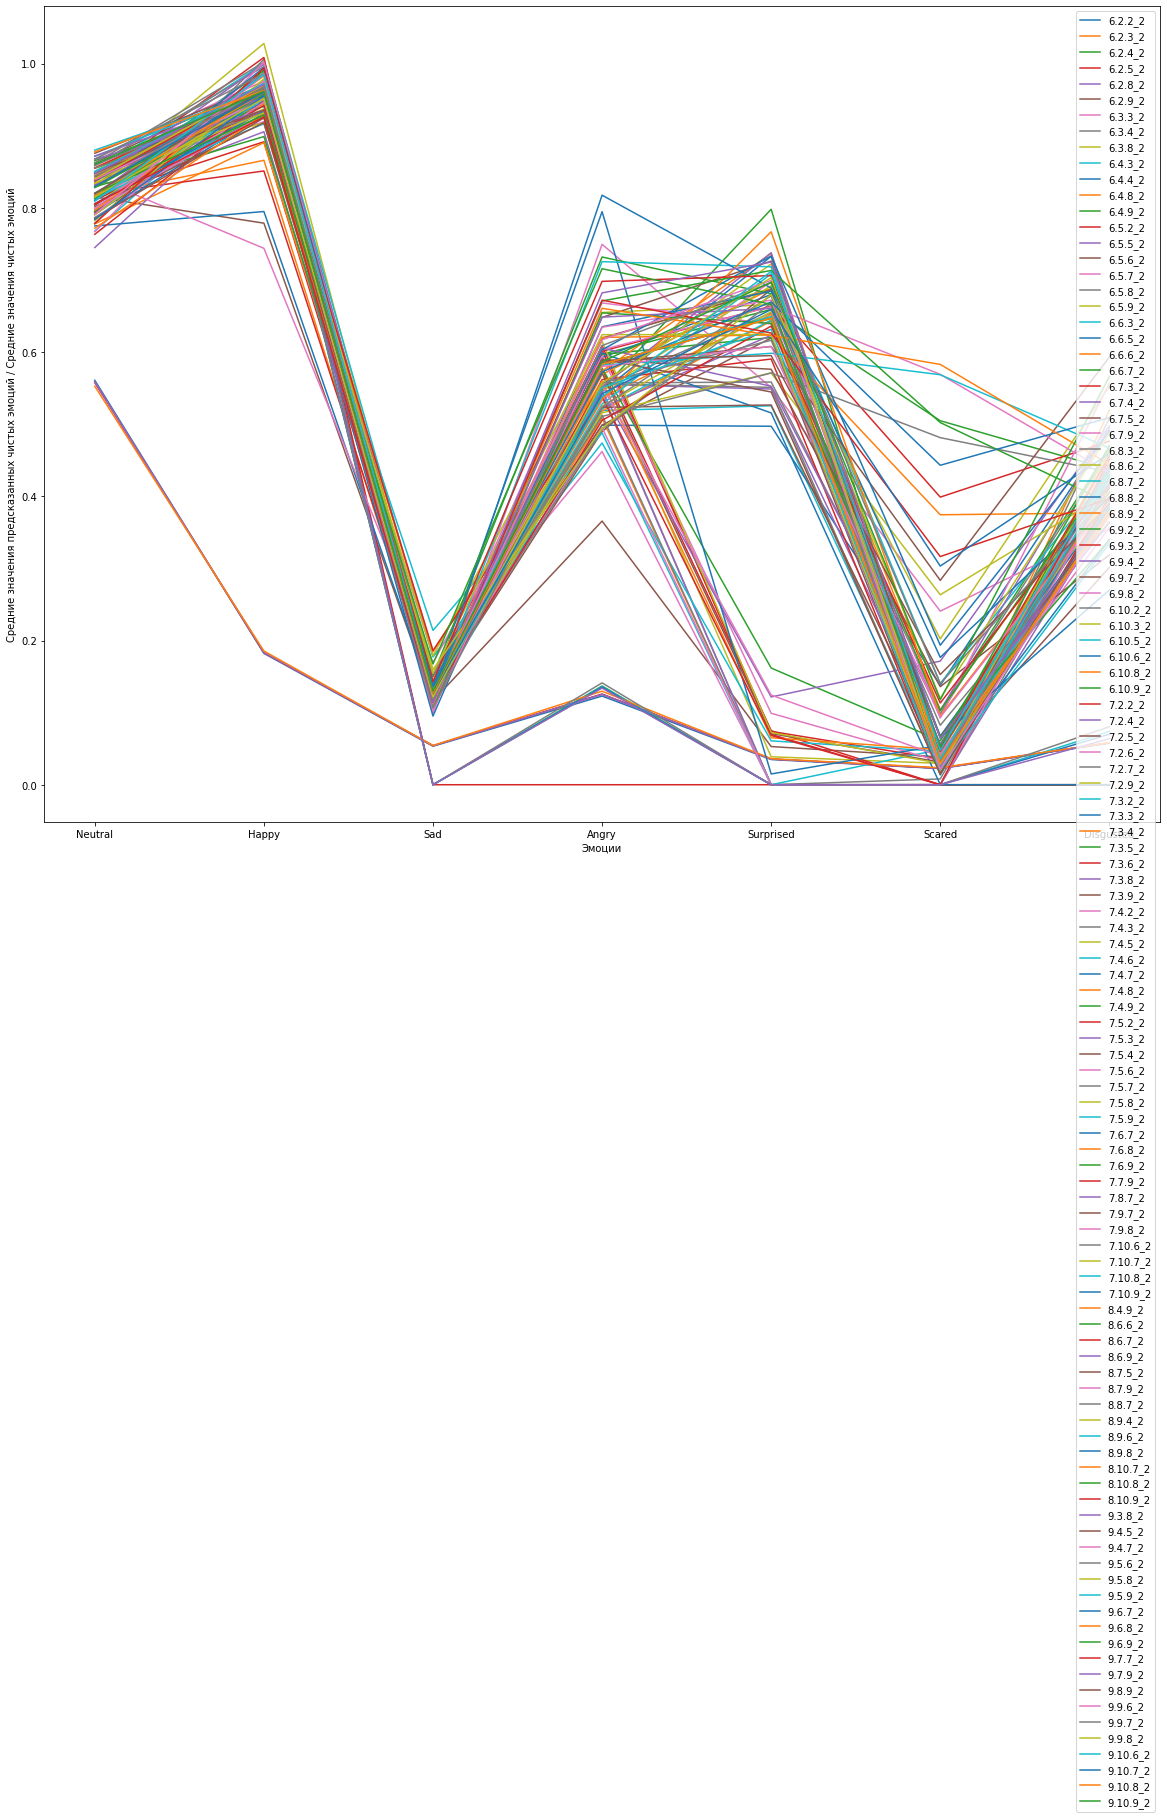

In [25]:
kwargs = {
    'models': models_2, 
    'df_clear': df_clear, 
    'df_clear_metrics': df_clear_metrics_2,
    'scale': True
}
df_clear_metrics_2 = tools.plot_emotions(**kwargs)

In [28]:
df_clear_metrics_2.sort_values('clear')[-15:]

model   Neutral     Happy       Sad     Angry  Surprised    Scared  \
93   8.10.9_2  0.837929  0.968134  0.142850  0.698102   0.706141  0.050377   
110  9.10.7_2  0.829739  0.960507  0.127127  0.542342   0.659064  0.303268   
81    8.4.9_2  0.797219  0.964841  0.125842  0.620428   0.623743  0.374414   
85    8.7.5_2  0.785360  0.924888  0.121883  0.585902   0.607654  0.283450   
112  9.10.9_2  0.860738  0.961803  0.129763  0.586477   0.696921  0.117886   
77   7.10.6_2  0.844184  0.955211  0.153599  0.510768   0.571066  0.481356   
90    8.9.8_2  0.837344  0.960689  0.139428  0.603144   0.733428  0.193457   
80   7.10.9_2  0.815988  0.953602  0.124568  0.817612   0.688882  0.176635   
73    7.7.9_2  0.804137  0.942169  0.104883  0.601171   0.663764  0.398900   
100   9.6.7_2  0.783972  0.955625  0.135888  0.572727   0.669529  0.443061   
12    6.4.9_2  0.795384  0.963934  0.134944  0.596876   0.659160  0.504822   
86    8.7.9_2  0.799123  0.975172  0.103130  0.603294   0.662888  0.569124   
92   8.10.8_2  0.828113  0.957079  0.118753  0.670973   0.713181  0.502312   
89    8.9.6_2  0.880095  0.962672  0.140115  0.582005   0.598404  0.568612   
101   9.6.8_2  0.816835  0.960591  0.123675  0.660742   0.623252  0.582922   

     Disgusted     clear  
93    0.455514  0.551292  
110   0.459348  0.554485  
81    0.377029  0.554788  
85    0.593027  0.557452  
112   0.565981  0.559938  
77    0.433786  0.564282  
90    0.490081  0.565367  
80    0.398415  0.567957  
73    0.476421  0.570206  
100   0.509159  0.581423  
12    0.437292  0.584630  
86    0.432445  0.592168  
92    0.390664  0.597296  
89    0.466850  0.599822  
101   0.444316  0.601762

### Строим графики метрик ['mean', 'norm', 'stat', 'clear'] для моделей с помощью tools.plot_metrics и tools.create_metric_df_dict

In [33]:
metrics = tools.metrics + ['clear']

In [34]:
metric_df_dict = tools.create_metric_df_dict(metrics, df_metrics_2, df_clear_metrics_2)
metric_df_dict

{'mean':         model  layer       N      mean      norm      stat
 0     6.2.2_2  third   6.2.2  0.169141  0.450900  0.462031
 1     6.2.3_2  third   6.2.3  0.079602  0.225136  0.445875
 2     6.2.4_2  third   6.2.4  0.092022  0.265427  0.458662
 3     6.2.5_2  third   6.2.5  0.088186  0.234775  0.451269
 4     6.2.8_2  third   6.2.8  0.169853  0.452297  0.462031
 ..        ...    ...     ...       ...       ...       ...
 108   9.9.8_2  third   9.9.8  0.075114  0.212436  0.479150
 109  9.10.6_2  third  9.10.6  0.087379  0.236245  0.491315
 110  9.10.7_2  third  9.10.7  0.083133  0.224627  0.497255
 111  9.10.8_2  third  9.10.8  0.069871  0.192484  0.493836
 112  9.10.9_2  third  9.10.9  0.075136  0.204608  0.508816
 
 [113 rows x 6 columns],
 'norm':         model  layer       N      mean      norm      stat
 0     6.2.2_2  third   6.2.2  0.169141  0.450900  0.462031
 1     6.2.3_2  third   6.2.3  0.079602  0.225136  0.445875
 2     6.2.4_2  third   6.2.4  0.092022  0.265427  0.4586

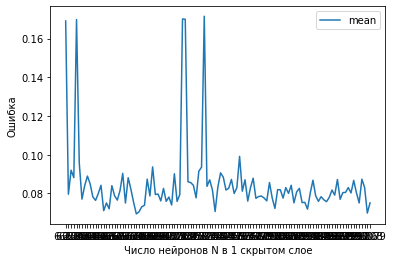

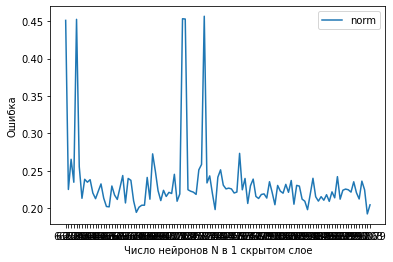

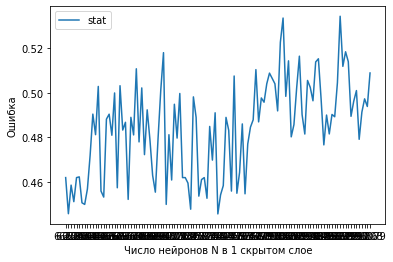

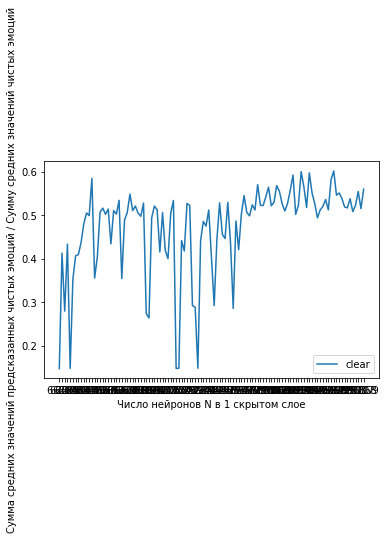

In [35]:
tools.plot_metrics(metric_df_dict)

### Сохранение df_metrics с помощью tools.save_to_db

In [36]:
v

2

In [46]:
layer

'third'

In [47]:
name_db = 'df_metrics'
dir_metric = 'model_metrics'
path_dir_metric = os.path.join(project_dir_path, dir_metric, layer, f'_{v}')
db_path = os.path.join(path_dir_metric, f'{name_db}_{v}.db')
db_path

'/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/model_metrics/third/_2/df_metrics_2.db'

In [54]:
tools.save_to_db(db_path, name_db, df_metrics_2)

In [55]:
connection = sqlite3.connect(db_path)
pd.read_sql(f'select * from {name_db}', con=connection)

model  layer       N                mean               norm  \
0     6.2.2_2  third   6.2.2   0.169140931334522  0.450899806660003   
1     6.2.3_2  third   6.2.3  0.0796015158666296  0.225136494756775   
2     6.2.4_2  third   6.2.4  0.0920220418928106  0.265426937260013   
3     6.2.5_2  third   6.2.5  0.0881856537945635  0.234774802099187   
4     6.2.8_2  third   6.2.8   0.169853379482445   0.45229713300235   
..        ...    ...     ...                 ...                ...   
108   9.9.8_2  third   9.9.8  0.0751136710441503  0.212435678128792   
109  9.10.6_2  third  9.10.6  0.0873792446945505   0.23624483268056   
110  9.10.7_2  third  9.10.7  0.0831332774232427  0.224626650084966   
111  9.10.8_2  third  9.10.8  0.0698709265001664  0.192483781889229   
112  9.10.9_2  third  9.10.9  0.0751360896623074  0.204608450159979   

                  stat  
0    0.462031185626984  
1    0.445875436067581  
2    0.458662331104279  
3    0.451269298791885  
4    0.462031185626984  
..                 ...  
108  0.479149609804153  
109  0.491315424442291  
110  0.497254908084869  
111  0.493836015462875  
112  0.508815705776215  

[113 rows x 6 columns]

### Сохранение df_clear_metrics с помощью tools.save_to_db

In [58]:
df_clear_metrics_2

model   Neutral     Happy           Sad     Angry     Surprised  \
0     6.2.2_2  0.560906  0.182232  5.340186e-02  0.122961  3.493534e-02   
1     6.2.3_2  0.816131  0.982911  1.387864e-01  0.508359  6.747112e-10   
2     6.2.4_2  0.831594  0.989780  8.657468e-12  0.136943  2.588999e-09   
3     6.2.5_2  0.810319  0.927203  1.501696e-01  0.602514  7.401464e-02   
4     6.2.8_2  0.558998  0.182854  5.401141e-02  0.125293  3.568598e-02   
..        ...       ...       ...           ...       ...           ...   
108   9.9.8_2  0.815096  0.951985  1.217749e-01  0.557730  7.031688e-01   
109  9.10.6_2  0.809280  0.985052  1.295795e-01  0.538257  7.119305e-01   
110  9.10.7_2  0.829739  0.960507  1.271270e-01  0.542342  6.590641e-01   
111  9.10.8_2  0.877667  0.962875  1.273457e-01  0.583329  6.467852e-01   
112  9.10.9_2  0.860738  0.961803  1.297628e-01  0.586477  6.969207e-01   

           Scared     Disgusted     clear  
0    2.243431e-02  5.762880e-02  0.147786  
1    6.084949e-05  4.449427e-01  0.413027  
2    4.731043e-08  3.221929e-10  0.279760  
3    3.562776e-02  4.347562e-01  0.433515  
4    2.272480e-02  5.808365e-02  0.148236  
..            ...           ...       ...  
108  2.852706e-02  3.795778e-01  0.508266  
109  4.787556e-02  4.366622e-01  0.522662  
110  3.032683e-01  4.593479e-01  0.554485  
111  3.018194e-02  3.779340e-01  0.515160  
112  1.178856e-01  5.659813e-01  0.559938  

[113 rows x 9 columns]

In [61]:
name_db = 'df_clear_metrics'
dir_metric = 'model_metrics'
path_dir_metric = os.path.join(project_dir_path, dir_metric, layer, f'_{v}')
db_path = os.path.join(path_dir_metric, f'{name_db}_{v}.db')
db_path

'/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/model_metrics/third/_2/df_clear_metrics_2.db'

In [63]:
tools.save_to_db(db_path, name_db, df_clear_metrics_2)

In [64]:
connection = sqlite3.connect(db_path)
pd.read_sql(f'select * from {name_db}', con=connection)

model            Neutral              Happy                   Sad  \
0     6.2.2_2  0.560906169900701  0.182231996113118    0.0534018604955658   
1     6.2.3_2  0.816130545655667  0.982910766138594     0.138786444573319   
2     6.2.4_2  0.831593564880894  0.989780419769053  8.65746795656402e-12   
3     6.2.5_2   0.81031869737244  0.927202906985004     0.150169602192336   
4     6.2.8_2  0.558998492767091  0.182853752196083    0.0540114142201404   
..        ...                ...                ...                   ...   
108   9.9.8_2  0.815096072309673  0.951985105393153      0.12177491291956   
109  9.10.6_2  0.809279965682768  0.985051736825409     0.129579458674992   
110  9.10.7_2  0.829738752042354  0.960506562354553     0.127126986128404   
111  9.10.8_2   0.87766744429103  0.962874651111609     0.127345735647032   
112  9.10.9_2  0.860738459838412  0.961802797194463     0.129762807899345   

                 Angry             Surprised                Scared  \
0    0.122960920651012    0.0349353374997471    0.0224343117545633   
1    0.508358745619464  6.74711213469114e-10  6.08494897902596e-05   
2    0.136943433777176  2.58899920265428e-09  4.73104326956405e-08   
3    0.602514190184194    0.0740146397757315    0.0356277597008967   
4    0.125292544465082    0.0356859770228748    0.0227247967439539   
..                 ...                   ...                   ...   
108  0.557729594209509     0.703168834887751    0.0285270605601516   
109  0.538256527245254     0.711930469144459    0.0478755646184379   
110  0.542342036858184     0.659064110821531     0.303268315745335   
111  0.583329456689895     0.646785222630769    0.0301819422519675   
112   0.58647737758997     0.696920660985187     0.117885598949358   

                Disgusted              clear  
0      0.0576288036310636  0.147785628577967  
1       0.444942737644979  0.413027155685218  
2    3.22192944320524e-10  0.279759638379629  
3       0.434756216838785  0.433514859007055  
4      0.0580836464267329  0.148235803405994  
..                    ...                ...  
108     0.379577822928881  0.508265629029811  
109     0.436662167031027  0.522662269888907  
110     0.459347918583032  0.554484954647627  
111     0.377934002652531  0.515159779324976  
112     0.565981280691805  0.559938426164077  

[113 rows x 9 columns]

### Загрузка всех 288 моделей // layer = 'third' ; v = 3

In [66]:
dir_model = 'saved_models'
path_to_saved_models = os.path.join(project_dir_path, dir_model)
path_to_saved_models

'/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/saved_models'

In [57]:
layer = 'third'
v = 3
models_3 = tools.load_models(path_to_saved_models, df, layer=layer, v=v)
models_3

[['6.2.3_3',
  '6.2.3',
 ['6.2.4_3',
  '6.2.4',
 ['6.3.3_3',
  '6.3.3',
 ['6.3.4_3',
  '6.3.4',
 ['6.3.8_3',
  '6.3.8',
 ['6.4.4_3',
  '6.4.4',
 ['6.4.8_3',
  '6.4.8',
 ['6.4.9_3',
  '6.4.9',
 ['6.5.5_3',
  '6.5.5',
 ['6.5.6_3',
  '6.5.6',
 ['6.5.7_3',
  '6.5.7',
 ['6.5.9_3',
  '6.5.9',
 ['6.6.3_3',
  '6.6.3',
 ['6.6.6_3',
  '6.6.6',
 ['6.6.7_3',
  '6.6.7',
 ['6.7.5_3',
  '6.7.5',
 ['6.7.9_3',
  '6.7.9',
 ['6.8.3_3',
  '6.8.3',
 ['6.8.6_3',
  '6.8.6',
 ['6.8.7_3',
  '6.8.7',
 ['6.8.8_3',
  '6.8.8',
 ['6.8.9_3',
  '6.8.9',
 ['6.9.2_3',
  '6.9.2',
 ['6.9.3_3',
  '6.9.3',
 ['6.9.4_3',
  '6.9.4',
 ['6.9.7_3',
  '6.9.7',
 ['6.9.8_3',
  '6.9.8',
 ['6.10.2_3',
  '6.10.2',
 ['6.10.3_3',
  '6.10.3',
 ['6.10.5_3',
  '6.10.5',
 ['6.10.8_3',
  '6.10.8',
 ['6.10.9_3',
  '6.10.9',
 ['7.2.6_3',
  '7.2.6',
 ['7.2.7_3',
  '7.2.7',
 ['7.2.9_3',
  '7.2.9',
 ['7.3.2_3',
  '7.3.2',
 ['7.3.6_3',
  '7.3.6',
 ['7.3.8_3',
  '7.3.8',
 ['7.3.9_3',
  '7.3.9',
 ['7.4.2_3',
  '7.4.2',
 ['7.4.5_3',
  '7.4.5',
 ['7.4

### Вычисление df_metrics с помощью tools.create_df_metrics 

In [67]:
df_metrics_3 = pd.DataFrame(columns = ['model', 'layer', 'N'] + tools.metrics)
df_metrics_3

Empty DataFrame
Columns: [model, layer, N, mean, norm, stat]
Index: []

In [59]:
df_metrics_3 = tools.create_df_metrics(models_3, test, df_metrics_3, layer=layer)
df_metrics_3

model  layer       N      mean      norm      stat
0    6.2.3_3  third   6.2.3  0.057991  0.163690  0.457281
1    6.2.4_3  third   6.2.4  0.070675  0.205286  0.482340
2    6.3.3_3  third   6.3.3  0.056950  0.157129  0.468819
3    6.3.4_3  third   6.3.4  0.061897  0.166982  0.454504
4    6.3.8_3  third   6.3.8  0.061931  0.167250  0.476301
..       ...    ...     ...       ...       ...       ...
84   9.9.8_3  third   9.9.8  0.050220  0.139108  0.510402
85  9.10.6_3  third  9.10.6  0.051412  0.140850  0.532072
86  9.10.7_3  third  9.10.7  0.051530  0.142812  0.525326
87  9.10.8_3  third  9.10.8  0.051058  0.141198  0.526553
88  9.10.9_3  third  9.10.9  0.050554  0.139299  0.554241

[89 rows x 6 columns]

In [61]:
df_metrics_3.sort_values('mean')[:15]

model  layer       N      mean      norm      stat
71  8.10.9_3  third  8.10.9  0.048564  0.135533  0.565291
59  7.10.9_3  third  7.10.9  0.048592  0.135877  0.573435
78   9.6.7_3  third   9.6.7  0.048910  0.136033  0.542240
79   9.6.8_3  third   9.6.8  0.048986  0.136826  0.572100
57  7.10.7_3  third  7.10.7  0.049133  0.136578  0.536160
55   7.9.8_3  third   7.9.8  0.049601  0.137344  0.557057
82   9.7.9_3  third   9.7.9  0.049791  0.137605  0.538095
58  7.10.8_3  third  7.10.8  0.049856  0.137711  0.532064
50   7.6.8_3  third   7.6.8  0.050021  0.138938  0.519920
70  8.10.8_3  third  8.10.8  0.050046  0.138653  0.561039
53   7.8.7_3  third   7.8.7  0.050160  0.138654  0.538957
83   9.9.7_3  third   9.9.7  0.050179  0.139339  0.538641
84   9.9.8_3  third   9.9.8  0.050220  0.139108  0.510402
16   6.7.9_3  third   6.7.9  0.050244  0.138823  0.552829
49   7.6.7_3  third   7.6.7  0.050267  0.139475  0.538758

### Сохранение df_metrics с помощью tools.save_to_db

In [71]:
name_db = 'df_metrics'
dir_metric = 'model_metrics'
path_dir_metric = os.path.join(project_dir_path, dir_metric, layer, f'_{v}')
db_path = os.path.join(path_dir_metric, f'{name_db}_{v}.db')
db_path

'/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/model_metrics/third/_3/df_metrics_3.db'

In [73]:
tools.save_to_db(db_path, name_db, df_metrics_3)

In [74]:
connection = sqlite3.connect(db_path)
pd.read_sql(f'select * from {name_db}', con=connection)

model  layer       N                mean               norm  \
0    6.2.3_3  third   6.2.3  0.0579908660301726  0.163690201478321   
1    6.2.4_3  third   6.2.4  0.0706749609566735  0.205285572094156   
2    6.3.3_3  third   6.3.3  0.0569495490403223  0.157129316021987   
3    6.3.4_3  third   6.3.4  0.0618974245685399  0.166982330601745   
4    6.3.8_3  third   6.3.8  0.0619305869334178  0.167249680603747   
..       ...    ...     ...                 ...                ...   
84   9.9.8_3  third   9.9.8  0.0502204319307943  0.139108407701329   
85  9.10.6_3  third  9.10.6  0.0514119464997997  0.140849948271884   
86  9.10.7_3  third  9.10.7  0.0515303921751849  0.142811841663165   
87  9.10.8_3  third  9.10.8  0.0510576177329518  0.141198064033228   
88  9.10.9_3  third  9.10.9  0.0505536588771601  0.139298885283521   

                 stat  
0    0.45728063583374  
1   0.482340157032013  
2   0.468818604946136  
3   0.454503774642944  
4   0.476300537586212  
..                ...  
84   0.51040244102478  
85  0.532071769237518  
86  0.525326490402222  
87  0.526553094387054  
88  0.554241359233856  

[89 rows x 6 columns]

### Вычисление df_clear_metrics и построение графиков с помощью tools.plot_emotions

In [75]:
df_clear_metrics_3 = pd.DataFrame(columns = ['model'] + list(seven_fields) + ['clear'])
df_clear_metrics_3

Empty DataFrame
Columns: [model, Neutral, Happy, Sad, Angry, Surprised, Scared, Disgusted, clear]
Index: []

In [67]:
len(models_3)

89

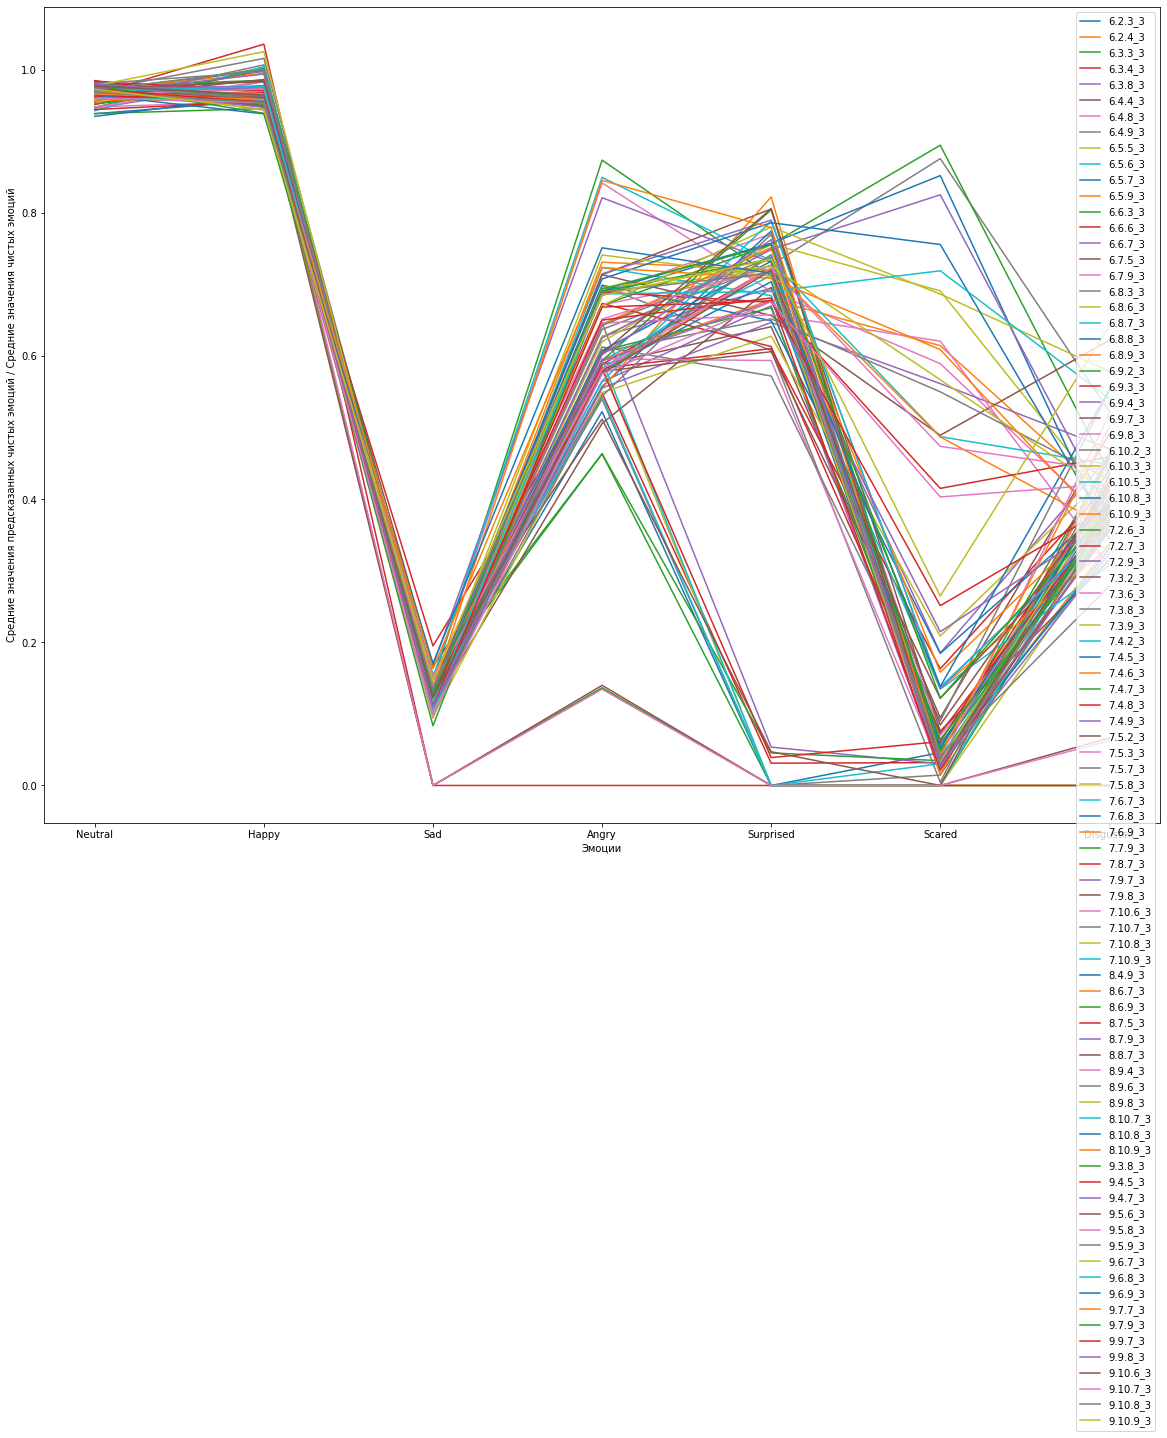

In [78]:
kwargs = {
    'models': models_3, 
    'df_clear': df_clear, 
    'df_clear_metrics': df_clear_metrics_3,
    'scale': True
}
df_clear_metrics_3 = tools.plot_emotions(**kwargs)

In [78]:
df_clear_metrics_3.sort_values('clear')[-15:]

model   Neutral     Happy       Sad     Angry  Surprised    Scared  \
21   6.8.9_3  0.974861  0.963609  0.123001  0.595046   0.679443  0.615103   
88  9.10.9_3  0.973723  0.945555  0.145877  0.685464   0.736119  0.265045   
81   9.7.7_3  0.967246  0.959201  0.163343  0.724255   0.709179  0.609601   
48   7.5.8_3  0.961335  0.959143  0.121391  0.620510   0.757141  0.691672   
78   9.6.7_3  0.978401  1.026232  0.109360  0.696175   0.726097  0.567380   
55   7.9.8_3  0.971415  0.985770  0.123713  0.714343   0.657268  0.489723   
16   6.7.9_3  0.970251  0.966050  0.148763  0.842641   0.690886  0.589966   
59  7.10.9_3  0.976738  0.965193  0.151273  0.850447   0.733776  0.487774   
64   8.7.9_3  0.968182  0.994887  0.121969  0.625719   0.749484  0.826006   
70  8.10.8_3  0.969363  0.977990  0.133581  0.708290   0.786975  0.756526   
79   9.6.8_3  0.970792  0.977521  0.112851  0.687385   0.690839  0.719781   
60   8.4.9_3  0.980371  0.962668  0.132187  0.691547   0.758000  0.852875   
68   8.9.8_3  0.970693  0.961556  0.116350  0.671257   0.781143  0.687235   
52   7.7.9_3  0.961566  0.962894  0.112881  0.671223   0.756564  0.895379   
7    6.4.9_3  0.964280  0.977377  0.124340  0.637771   0.727797  0.876614   

    Disgusted     clear  
21   0.401769  0.621833  
88   0.642260  0.627721  
81   0.357279  0.641443  
48   0.395368  0.643794  
78   0.407206  0.644407  
55   0.622635  0.652124  
16   0.365715  0.653467  
59   0.448819  0.659146  
64   0.380493  0.666677  
70   0.354966  0.669670  
79   0.540857  0.671432  
60   0.344619  0.674610  
68   0.579166  0.681057  
52   0.437085  0.685370  
7    0.522971  0.690164

### Сохранение df_clear_metrics с помощью tools.save_to_db

In [79]:
name_db = 'df_clear_metrics'
dir_metric = 'model_metrics'
path_dir_metric = os.path.join(project_dir_path, dir_metric, layer, f'_{v}')
db_path = os.path.join(path_dir_metric, f'{name_db}_{v}.db')
db_path

'/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/model_metrics/third/_3/df_clear_metrics_3.db'

In [81]:
tools.save_to_db(db_path, name_db, df_clear_metrics_3)

In [82]:
df_clear_metrics_3

model   Neutral     Happy           Sad     Angry     Surprised  \
0    6.2.3_3  0.939440  0.958169  1.222761e-01  0.522883  1.292657e-11   
1    6.2.4_3  0.955329  0.971957  2.333794e-10  0.135952  7.721904e-08   
2    6.3.3_3  0.970645  0.972203  1.547974e-01  0.463873  3.567766e-10   
3    6.3.4_3  0.952264  1.000132  1.231047e-01  0.548844  3.120865e-02   
4    6.3.8_3  0.947236  0.984099  1.331876e-01  0.646775  5.365223e-02   
..       ...       ...       ...           ...       ...           ...   
84   9.9.8_3  0.980842  0.963760  1.097963e-01  0.602308  7.632072e-01   
85  9.10.6_3  0.978218  0.965504  1.230332e-01  0.576023  7.206441e-01   
86  9.10.7_3  0.961687  0.954793  9.913950e-02  0.575443  6.766210e-01   
87  9.10.8_3  0.969331  0.954879  1.347888e-01  0.689921  7.164522e-01   
88  9.10.9_3  0.973723  0.945555  1.458773e-01  0.685464  7.361194e-01   

          Scared     Disgusted     clear  
0   4.599866e-02  4.034752e-01  0.427463  
1   2.269218e-08  4.935617e-09  0.294748  
2   1.071602e-08  3.817180e-01  0.420462  
3   3.196455e-02  3.589247e-01  0.435206  
4   3.036473e-02  3.916716e-01  0.455284  
..           ...           ...       ...  
84  2.690198e-02  3.248550e-01  0.538810  
85  8.466598e-02  4.180639e-01  0.552307  
86  4.034633e-01  4.216550e-01  0.584686  
87  4.124110e-02  2.789712e-01  0.540798  
88  2.650448e-01  6.422600e-01  0.627721  

[89 rows x 9 columns]

In [83]:
connection = sqlite3.connect(db_path)
pd.read_sql(f'select * from {name_db}', con=connection)

model            Neutral              Happy                   Sad  \
0    6.2.3_3  0.939439707664744  0.958169299091679     0.122276120915088   
1    6.2.4_3  0.955328743758068  0.971956897454478  2.33379366193366e-10   
2    6.3.3_3   0.97064515429386  0.972202654195619     0.154797411663974   
3    6.3.4_3  0.952264317981465   1.00013211600869     0.123104725841864   
4    6.3.8_3  0.947236369935608  0.984099405014669     0.133187627263379   
..       ...                ...                ...                   ...   
84   9.9.8_3  0.980842244895192  0.963760313830281     0.109796331112056   
85  9.10.6_3  0.978217706020376  0.965504267792876     0.123033189641315   
86  9.10.7_3  0.961686998368478  0.954793092851537    0.0991394952907804   
87  9.10.8_3  0.969330907768316  0.954878596125039     0.134788847951995   
88  9.10.9_3   0.97372332843719  0.945555350464021     0.145877264853325   

                Angry             Surprised                Scared  \
0   0.522883230496455  1.29265680421696e-11    0.0459986611032019   
1   0.135952138288714  7.72190391314342e-08  2.26921784195499e-08   
2   0.463873071459099  3.56776630476728e-10  1.07160224049449e-08   
3   0.548843892341178    0.0312086485994202     0.031964550269585   
4   0.646774510102066    0.0536522301867905    0.0303647298292787   
..                ...                   ...                   ...   
84  0.602308176501351     0.763207197686382    0.0269019775384781   
85  0.576022948239481     0.720644075892053    0.0846659801169938   
86  0.575443159880132     0.676620992378198      0.40346328534332   
87  0.689921095323952     0.716452200102922    0.0412410965152815   
88  0.685464014389412     0.736119371888702     0.265044792025697   

               Disgusted              clear  
0      0.403475214467929  0.427463176250289  
1   4.93561720285483e-09  0.294748269225925  
2      0.381717996378512  0.420462328437695  
3       0.35892468920838  0.435206134321511  
4      0.391671630214974  0.455283786078109  
..                   ...                ...  
84     0.324855040956961  0.538810183217243  
85     0.418063932961791  0.552307442952127  
86     0.421655004041908  0.584686004022051  
87     0.278971180304248  0.540797703441679  
88     0.642259998540312  0.627720588656951  

[89 rows x 9 columns]

### Загрузка всех 288 моделей // layer = 'third' ; v = 4

In [86]:
dir_model = 'saved_models'
path_to_saved_models = os.path.join(project_dir_path, dir_model)
path_to_saved_models

'/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/saved_models'

In [81]:
layer = 'third'
v = 4
models_4 = tools.load_models(path_to_saved_models, df, layer=layer, v=v)
models_4

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Test/../nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Test/../nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))


[['6.4.9_4',
  '6.4.9',
 ['6.5.6_4',
  '6.5.6',
 ['6.5.7_4',
  '6.5.7',
 ['6.6.7_4',
  '6.6.7',
 ['6.7.9_4',
  '6.7.9',
 ['6.8.3_4',
  '6.8.3',
 ['6.8.6_4',
  '6.8.6',
 ['6.8.7_4',
  '6.8.7',
 ['6.8.8_4',
  '6.8.8',
 ['6.8.9_4',
  '6.8.9',
 ['6.9.3_4',
  '6.9.3',
 ['6.9.4_4',
  '6.9.4',
 ['6.9.7_4',
  '6.9.7',
 ['6.9.8_4',
  '6.9.8',
 ['6.10.2_4',
  '6.10.2',
 ['6.10.3_4',
  '6.10.3',
 ['6.10.8_4',
  '6.10.8',
 ['6.10.9_4',
  '6.10.9',
 ['7.2.7_4',
  '7.2.7',
 ['7.2.9_4',
  '7.2.9',
 ['7.3.2_4',
  '7.3.2',
 ['7.3.8_4',
  '7.3.8',
 ['7.4.2_4',
  '7.4.2',
 ['7.4.7_4',
  '7.4.7',
 ['7.4.8_4',
  '7.4.8',
 ['7.4.9_4',
  '7.4.9',
 ['7.5.2_4',
  '7.5.2',
 ['7.5.7_4',
  '7.5.7',
 ['7.5.8_4',
  '7.5.8',
 ['7.6.7_4',
  '7.6.7',
 ['7.6.8_4',
  '7.6.8',
 ['7.6.9_4',
  '7.6.9',
 ['7.7.9_4',
  '7.7.9',
 ['7.8.7_4',
  '7.8.7',
 ['7.9.7_4',
  '7.9.7',
 ['7.9.8_4',
  '7.9.8',
 ['7.10.7_4',
  '7.10.7',
 ['7.10.8_4',
  '7.10.8',
 ['7.10.9_4',
  '7.10.9',
 ['8.4.9_4',
  '8.4.9',
 ['8.6.9_4',
  '8.6.9',
 [

### Вычисление df_metrics с помощью tools.create_df_metrics 

In [87]:
df_metrics_4 = pd.DataFrame(columns = ['model', 'layer', 'N'] + tools.metrics)
df_metrics_4

Empty DataFrame
Columns: [model, layer, N, mean, norm, stat]
Index: []

In [93]:
df_metrics_4 = tools.create_df_metrics(models_4, test, df_metrics_4, layer=layer)
df_metrics_4

model  layer       N      mean      norm      stat
0    6.4.9_4  third   6.4.9  0.076582  0.211930  0.514082
1    6.5.6_4  third   6.5.6  0.077405  0.209759  0.501348
2    6.5.7_4  third   6.5.7  0.066316  0.187070  0.517853
3    6.6.7_4  third   6.6.7  0.078447  0.219662  0.497036
4    6.7.9_4  third   6.7.9  0.073664  0.207983  0.525809
..       ...    ...     ...       ...       ...       ...
59   9.9.7_4  third   9.9.7  0.083702  0.240001  0.512982
60   9.9.8_4  third   9.9.8  0.089502  0.250470  0.494891
61  9.10.6_4  third  9.10.6  0.085292  0.233404  0.515065
62  9.10.8_4  third  9.10.8  0.082049  0.224656  0.524800
63  9.10.9_4  third  9.10.9  0.077841  0.213765  0.535252

[64 rows x 6 columns]

In [89]:
df_metrics_4.sort_values('mean')[:15]

model  layer       N      mean      norm      stat
2    6.5.7_4  third   6.5.7  0.066316  0.187070  0.517853
48  8.10.9_4  third  8.10.9  0.067530  0.187015  0.542466
51   9.5.6_4  third   9.5.6  0.068765  0.186944  0.516046
50   9.4.7_4  third   9.4.7  0.068979  0.195645  0.515114
38  7.10.9_4  third  7.10.9  0.069402  0.204104  0.538066
7    6.8.7_4  third   6.8.7  0.070135  0.190721  0.476670
32   7.7.9_4  third   7.7.9  0.071293  0.202627  0.507180
44   8.9.6_4  third   8.9.6  0.071895  0.202325  0.506924
6    6.8.6_4  third   6.8.6  0.072582  0.197785  0.525194
40   8.6.9_4  third   8.6.9  0.072910  0.197812  0.491606
4    6.7.9_4  third   6.7.9  0.073664  0.207983  0.525809
52   9.5.8_4  third   9.5.8  0.073696  0.206634  0.504869
5    6.8.3_4  third   6.8.3  0.073882  0.204959  0.506758
47  8.10.8_4  third  8.10.8  0.074032  0.211781  0.525694
17  6.10.9_4  third  6.10.9  0.074288  0.202788  0.505200

### Сохранение df_metrics с помощью tools.save_to_db

In [90]:
name_db = 'df_metrics'
dir_metric = 'model_metrics'
path_dir_metric = os.path.join(project_dir_path, dir_metric, layer, f'_{v}')
db_path = os.path.join(path_dir_metric, f'{name_db}_{v}.db')
db_path

'/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/model_metrics/third/_4/df_metrics_4.db'

In [92]:
tools.save_to_db(db_path, name_db, df_metrics_4)

In [93]:
connection = sqlite3.connect(db_path)
pd.read_sql(f'select * from {name_db}', con=connection)

model  layer       N                mean               norm  \
0    6.4.9_4  third   6.4.9  0.0765823908073903   0.21192994520295   
1    6.5.6_4  third   6.5.6  0.0774050257197583  0.209758568072702   
2    6.5.7_4  third   6.5.7    0.06631600803716  0.187069867655497   
3    6.6.7_4  third   6.6.7  0.0784467724594775  0.219661552196314   
4    6.7.9_4  third   6.7.9  0.0736635462271576  0.207983457819894   
..       ...    ...     ...                 ...                ...   
59   9.9.7_4  third   9.9.7  0.0837015940766981  0.240000965010552   
60   9.9.8_4  third   9.9.8  0.0895018509216658  0.250469939852326   
61  9.10.6_4  third  9.10.6  0.0852922085335013    0.2334039502805   
62  9.10.8_4  third  9.10.8  0.0820485171293449  0.224656096292585   
63  9.10.9_4  third  9.10.9  0.0778407975963627  0.213765458186896   

                 stat  
0   0.514082312583923  
1   0.501348316669464  
2   0.517853200435638  
3   0.497036308050156  
4   0.525808691978455  
..                ...  
59  0.512982368469238  
60  0.494890511035919  
61  0.515065431594849  
62  0.524800062179565  
63  0.535252392292023  

[64 rows x 6 columns]

### Вычисление df_clear_metrics и построение графиков с помощью tools.plot_emotions

In [94]:
df_clear_metrics_4 = pd.DataFrame(columns = ['model'] + list(seven_fields) + ['clear'])
df_clear_metrics_4

Empty DataFrame
Columns: [model, Neutral, Happy, Sad, Angry, Surprised, Scared, Disgusted, clear]
Index: []

In [100]:
len(models_4)

64

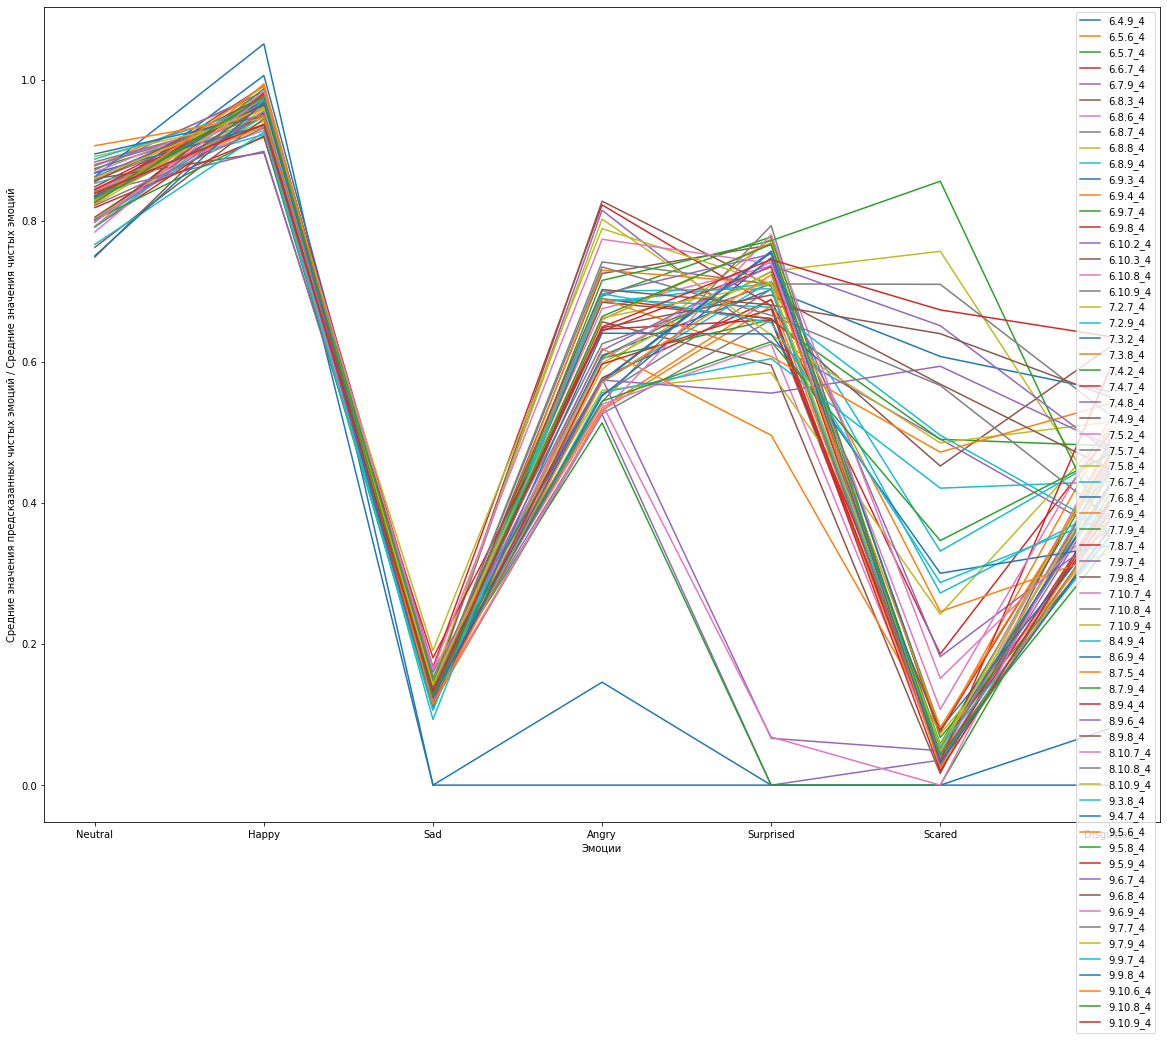

In [101]:
kwargs = {
    'models': models_4, 
    'df_clear': df_clear, 
    'df_clear_metrics': df_clear_metrics_4,
    'scale': True
}
df_clear_metrics_4 = tools.plot_emotions(**kwargs)

In [96]:
df_clear_metrics_4.sort_values('clear')[-15:]

model   Neutral     Happy       Sad     Angry  Surprised    Scared  \
32   7.7.9_4  0.840078  0.935776  0.130885  0.604960   0.659650  0.490135   
44   8.9.6_4  0.861961  0.965314  0.125041  0.574159   0.555641  0.593712   
41   8.7.5_4  0.839486  0.933212  0.143837  0.689078   0.607472  0.472008   
57   9.7.7_4  0.821548  0.931445  0.134041  0.734512   0.665842  0.566571   
4    6.7.9_4  0.832373  0.979066  0.139386  0.814823   0.627763  0.490420   
35   7.9.8_4  0.762254  0.944615  0.120221  0.684450   0.661523  0.452321   
45   8.9.8_4  0.855176  0.976035  0.127257  0.648171   0.694673  0.568329   
28   7.5.8_4  0.802692  0.958366  0.132820  0.597980   0.728329  0.756653   
54   9.6.7_4  0.800279  0.955084  0.139189  0.616214   0.736589  0.651195   
38  7.10.9_4  0.822265  0.968200  0.149652  0.802326   0.638267  0.485087   
0    6.4.9_4  0.825987  1.005795  0.129256  0.609030   0.702518  0.607604   
55   9.6.8_4  0.804979  0.964244  0.137538  0.702455   0.680525  0.639860   
47  8.10.8_4  0.831804  0.947268  0.152878  0.625528   0.710396  0.709846   
42   8.7.9_4  0.801196  0.920010  0.106900  0.715390   0.771689  0.855976   
63  9.10.9_4  0.838833  0.936895  0.132985  0.649408   0.744841  0.673594   

    Disgusted     clear  
32   0.480932  0.591774  
44   0.481200  0.593861  
41   0.540760  0.603693  
57   0.378985  0.604706  
4    0.354401  0.605462  
35   0.620476  0.606552  
45   0.448422  0.616866  
28   0.388106  0.623564  
54   0.471131  0.624240  
38   0.514772  0.625795  
0    0.558148  0.634048  
55   0.550507  0.640016  
47   0.525596  0.643331  
42   0.348347  0.645644  
63   0.635892  0.658921

### Сохранение df_clear_metrics с помощью tools.save_to_db

In [98]:
name_db = 'df_clear_metrics'
dir_metric = 'model_metrics'
path_dir_metric = os.path.join(project_dir_path, dir_metric, layer, f'_{v}')
db_path = os.path.join(path_dir_metric, f'{name_db}_{v}.db')
db_path

'/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/model_metrics/third/_4/df_clear_metrics_4.db'

In [100]:
tools.save_to_db(db_path, name_db, df_clear_metrics_4)

In [101]:
connection = sqlite3.connect(db_path)
pd.read_sql(f'select * from {name_db}', con=connection)

model            Neutral              Happy                Sad  \
0    6.4.9_4  0.825987455430725   1.00579475277288  0.129255516640547   
1    6.5.6_4  0.877406894491507  0.978769266498498   0.14014134269131   
2    6.5.7_4  0.873980327001954  0.947907277016939  0.132025814897096   
3    6.6.7_4  0.856674418300482   0.96558488330303  0.132751483735872   
4    6.7.9_4   0.83237272010674   0.97906585597846  0.139386389882742   
..       ...                ...                ...                ...   
59   9.9.7_4  0.766420709914055  0.925646252113908  0.106452015802713   
60   9.9.8_4   0.75017336461709  0.968018337748594  0.124730163869314   
61  9.10.6_4  0.823849158570289  0.991148015953846  0.114431909968849   
62  9.10.8_4  0.826203292621644  0.976114624468889  0.127200753960859   
63  9.10.9_4  0.838832566630575  0.936894820342824  0.132984953759778   

                Angry          Surprised              Scared  \
0   0.609029816635292  0.702518444246845    0.60760355463215   
1   0.534355120174804  0.688931194753428  0.0506140036033649   
2   0.606738878381433  0.727639627423529  0.0584554767199591   
3   0.577297650251533  0.687960020115676   0.185861365467894   
4   0.814822551945405  0.627762725404603    0.49042006333669   
..                ...                ...                 ...   
59  0.696383045601595  0.655527223390867   0.287209509634504   
60  0.572308703926647  0.755042707530718  0.0322779932735013   
61  0.571659203866538  0.723239425323836  0.0815844492000692   
62  0.664277104541329  0.766672944757489  0.0429118490394424   
63  0.649408314859575  0.744840869313731   0.673594018992256   

            Disgusted              clear  
0   0.558147527378468  0.634048152533844  
1   0.426258048872008   0.52806798158356  
2   0.463360044580804  0.544301063717388  
3    0.49731548685227  0.557635044003822  
4    0.35440079611459   0.60546158610989  
..                ...                ...  
59  0.381949515984131  0.545655467491682  
60  0.362071366951538  0.509231805416772  
61  0.464108893968266  0.538574436693099  
62  0.340060409589654   0.53477728271133  
63  0.635892370321455  0.658921130602885  

[64 rows x 9 columns]

### Загрузка всех 288 моделей // layer = 'third' ; v = 5

In [102]:
dir_model = 'saved_models'
path_to_saved_models = os.path.join(project_dir_path, dir_model)
path_to_saved_models

'/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/saved_models'

In [107]:
layer = 'third'
v = 5
models_5 = tools.load_models(path_to_saved_models, df, layer=layer, v=v)
models_5

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Test/../nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Test/../nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))


[['6.4.9_5',
  '6.4.9',
 ['6.5.6_5',
  '6.5.6',
 ['6.5.7_5',
  '6.5.7',
 ['6.6.7_5',
  '6.6.7',
 ['6.7.9_5',
  '6.7.9',
 ['6.8.3_5',
  '6.8.3',
 ['6.8.6_5',
  '6.8.6',
 ['6.8.7_5',
  '6.8.7',
 ['6.8.8_5',
  '6.8.8',
 ['6.8.9_5',
  '6.8.9',
 ['6.9.3_5',
  '6.9.3',
 ['6.9.4_5',
  '6.9.4',
 ['6.9.7_5',
  '6.9.7',
 ['6.10.2_5',
  '6.10.2',
 ['6.10.3_5',
  '6.10.3',
 ['6.10.8_5',
  '6.10.8',
 ['6.10.9_5',
  '6.10.9',
 ['7.3.2_5',
  '7.3.2',
 ['7.3.8_5',
  '7.3.8',
 ['7.4.2_5',
  '7.4.2',
 ['7.4.7_5',
  '7.4.7',
 ['7.4.9_5',
  '7.4.9',
 ['7.5.2_5',
  '7.5.2',
 ['7.5.7_5',
  '7.5.7',
 ['7.5.8_5',
  '7.5.8',
 ['7.6.7_5',
  '7.6.7',
 ['7.6.8_5',
  '7.6.8',
 ['7.6.9_5',
  '7.6.9',
 ['7.7.9_5',
  '7.7.9',
 ['7.9.7_5',
  '7.9.7',
 ['7.9.8_5',
  '7.9.8',
 ['7.10.7_5',
  '7.10.7',
 ['7.10.8_5',
  '7.10.8',
 ['7.10.9_5',
  '7.10.9',
 ['8.6.9_5',
  '8.6.9',
 ['8.7.5_5',
  '8.7.5',
 ['8.7.9_5',
  '8.7.9',
 ['8.9.4_5',
  '8.9.4',
 ['8.9.6_5',
  '8.9.6',
 ['8.9.8_5',
  '8.9.8',
 ['8.10.7_5',
  '8.10.7',


In [108]:
len(models_5)

56

### Вычисление df_metrics с помощью tools.create_df_metrics 

In [104]:
df_metrics_5 = pd.DataFrame(columns = ['model', 'layer', 'N'] + tools.metrics)
df_metrics_5

Empty DataFrame
Columns: [model, layer, N, mean, norm, stat]
Index: []

In [110]:
df_metrics_5 = tools.create_df_metrics(models_5, test, df_metrics_5, layer=layer)
df_metrics_5

model  layer       N      mean      norm      stat
0    6.4.9_5  third   6.4.9  0.049450  0.137629  0.555500
1    6.5.6_5  third   6.5.6  0.051510  0.141843  0.540040
2    6.5.7_5  third   6.5.7  0.049111  0.135486  0.557289
3    6.6.7_5  third   6.6.7  0.050849  0.140907  0.539387
4    6.7.9_5  third   6.7.9  0.049933  0.138603  0.530336
5    6.8.3_5  third   6.8.3  0.051051  0.142206  0.531685
6    6.8.6_5  third   6.8.6  0.051246  0.141795  0.555283
7    6.8.7_5  third   6.8.7  0.052489  0.143851  0.499005
8    6.8.8_5  third   6.8.8  0.050469  0.139653  0.528624
9    6.8.9_5  third   6.8.9  0.050292  0.139357  0.525771
10   6.9.3_5  third   6.9.3  0.065587  0.201726  0.469048
11   6.9.4_5  third   6.9.4  0.052156  0.143821  0.502367
12   6.9.7_5  third   6.9.7  0.051452  0.140447  0.556503
13  6.10.2_5  third  6.10.2  0.057277  0.157787  0.479796
14  6.10.3_5  third  6.10.3  0.050447  0.140181  0.550478
15  6.10.8_5  third  6.10.8  0.052331  0.144626  0.517180
16  6.10.9_5  third  6.10.9  0.049765  0.136561  0.536334
17   7.3.2_5  third   7.3.2  0.070527  0.198938  0.467650
18   7.3.8_5  third   7.3.8  0.056873  0.155117  0.565127
19   7.4.2_5  third   7.4.2  0.059993  0.167392  0.483160
20   7.4.7_5  third   7.4.7  0.056037  0.152016  0.553790
21   7.4.9_5  third   7.4.9  0.051079  0.141636  0.534082
22   7.5.2_5  third   7.5.2  0.056935  0.156191  0.469968
23   7.5.7_5  third   7.5.7  0.051820  0.142156  0.510084
24   7.5.8_5  third   7.5.8  0.050452  0.140177  0.559416
25   7.6.7_5  third   7.6.7  0.050676  0.141191  0.555627
26   7.6.8_5  third   7.6.8  0.050828  0.140131  0.545476
27   7.6.9_5  third   7.6.9  0.049226  0.136545  0.553670
28   7.7.9_5  third   7.7.9  0.049886  0.139715  0.554594
29   7.9.7_5  third   7.9.7  0.048923  0.134905  0.567739
30   7.9.8_5  third   7.9.8  0.049126  0.136223  0.578327
31  7.10.7_5  third  7.10.7  0.048074  0.133891  0.567367
32  7.10.8_5  third  7.10.8  0.050757  0.140607  0.550133
33  7.10.9_5  third  7.10.9  0.047961  0.133694  0.565889
34   8.6.9_5  third   8.6.9  0.051792  0.141854  0.518356
35   8.7.5_5  third   8.7.5  0.050604  0.139826  0.549985
36   8.7.9_5  third   8.7.9  0.050180  0.139627  0.573463
37   8.9.4_5  third   8.9.4  0.049812  0.136702  0.540907
38   8.9.6_5  third   8.9.6  0.051521  0.142742  0.529727
39   8.9.8_5  third   8.9.8  0.049130  0.135990  0.549931
40  8.10.7_5  third  8.10.7  0.050531  0.139305  0.555722
41  8.10.8_5  third  8.10.8  0.049758  0.137691  0.566595
42  8.10.9_5  third  8.10.9  0.049014  0.136154  0.581751
43   9.3.8_5  third   9.3.8  0.050103  0.138624  0.547757
44   9.4.7_5  third   9.4.7  0.050387  0.139227  0.537911
45   9.5.6_5  third   9.5.6  0.052217  0.143856  0.546814
46   9.5.8_5  third   9.5.8  0.051370  0.142515  0.540665
47   9.6.7_5  third   9.6.7  0.048896  0.135041  0.548675
48   9.6.8_5  third   9.6.8  0.048610  0.134730  0.579636
49   9.6.9_5  third   9.6.9  0.050331  0.139999  0.581029
50   9.7.7_5  third   9.7.7  0.051775  0.143636  0.584851
51   9.7.9_5  third   9.7.9  0.049886  0.137917  0.560358
52   9.9.8_5  third   9.9.8  0.051009  0.141115  0.517502
53  9.10.6_5  third  9.10.6  0.050438  0.140467  0.538083
54  9.10.8_5  third  9.10.8  0.050168  0.137995  0.530121
55  9.10.9_5  third  9.10.9  0.050811  0.139837  0.575180

In [106]:
df_metrics_5.sort_values('mean')

model  layer       N      mean      norm      stat
33  7.10.9_5  third  7.10.9  0.047961  0.133694  0.565889
31  7.10.7_5  third  7.10.7  0.048074  0.133891  0.567367
48   9.6.8_5  third   9.6.8  0.048610  0.134730  0.579636
47   9.6.7_5  third   9.6.7  0.048896  0.135041  0.548675
29   7.9.7_5  third   7.9.7  0.048923  0.134905  0.567739
42  8.10.9_5  third  8.10.9  0.049014  0.136154  0.581751
2    6.5.7_5  third   6.5.7  0.049111  0.135486  0.557289
30   7.9.8_5  third   7.9.8  0.049126  0.136223  0.578327
39   8.9.8_5  third   8.9.8  0.049130  0.135990  0.549931
27   7.6.9_5  third   7.6.9  0.049226  0.136545  0.553670
0    6.4.9_5  third   6.4.9  0.049450  0.137629  0.555500
41  8.10.8_5  third  8.10.8  0.049758  0.137691  0.566595
16  6.10.9_5  third  6.10.9  0.049765  0.136561  0.536334
37   8.9.4_5  third   8.9.4  0.049812  0.136702  0.540907
28   7.7.9_5  third   7.7.9  0.049886  0.139715  0.554594
51   9.7.9_5  third   9.7.9  0.049886  0.137917  0.560358
4    6.7.9_5  third   6.7.9  0.049933  0.138603  0.530336
43   9.3.8_5  third   9.3.8  0.050103  0.138624  0.547757
54  9.10.8_5  third  9.10.8  0.050168  0.137995  0.530121
36   8.7.9_5  third   8.7.9  0.050180  0.139627  0.573463
9    6.8.9_5  third   6.8.9  0.050292  0.139357  0.525771
49   9.6.9_5  third   9.6.9  0.050331  0.139999  0.581029
44   9.4.7_5  third   9.4.7  0.050387  0.139227  0.537911
53  9.10.6_5  third  9.10.6  0.050438  0.140467  0.538083
14  6.10.3_5  third  6.10.3  0.050447  0.140181  0.550478
24   7.5.8_5  third   7.5.8  0.050452  0.140177  0.559416
8    6.8.8_5  third   6.8.8  0.050469  0.139653  0.528624
40  8.10.7_5  third  8.10.7  0.050531  0.139305  0.555722
35   8.7.5_5  third   8.7.5  0.050604  0.139826  0.549985
25   7.6.7_5  third   7.6.7  0.050676  0.141191  0.555627
32  7.10.8_5  third  7.10.8  0.050757  0.140607  0.550133
55  9.10.9_5  third  9.10.9  0.050811  0.139837  0.575180
26   7.6.8_5  third   7.6.8  0.050828  0.140131  0.545476
3    6.6.7_5  third   6.6.7  0.050849  0.140907  0.539387
52   9.9.8_5  third   9.9.8  0.051009  0.141115  0.517502
5    6.8.3_5  third   6.8.3  0.051051  0.142206  0.531685
21   7.4.9_5  third   7.4.9  0.051079  0.141636  0.534082
6    6.8.6_5  third   6.8.6  0.051246  0.141795  0.555283
46   9.5.8_5  third   9.5.8  0.051370  0.142515  0.540665
12   6.9.7_5  third   6.9.7  0.051452  0.140447  0.556503
1    6.5.6_5  third   6.5.6  0.051510  0.141843  0.540040
38   8.9.6_5  third   8.9.6  0.051521  0.142742  0.529727
50   9.7.7_5  third   9.7.7  0.051775  0.143636  0.584851
34   8.6.9_5  third   8.6.9  0.051792  0.141854  0.518356
23   7.5.7_5  third   7.5.7  0.051820  0.142156  0.510084
11   6.9.4_5  third   6.9.4  0.052156  0.143821  0.502367
45   9.5.6_5  third   9.5.6  0.052217  0.143856  0.546814
15  6.10.8_5  third  6.10.8  0.052331  0.144626  0.517180
7    6.8.7_5  third   6.8.7  0.052489  0.143851  0.499005
20   7.4.7_5  third   7.4.7  0.056037  0.152016  0.553790
18   7.3.8_5  third   7.3.8  0.056873  0.155117  0.565127
22   7.5.2_5  third   7.5.2  0.056935  0.156191  0.469968
13  6.10.2_5  third  6.10.2  0.057277  0.157787  0.479796
19   7.4.2_5  third   7.4.2  0.059993  0.167392  0.483160
10   6.9.3_5  third   6.9.3  0.065587  0.201726  0.469048
17   7.3.2_5  third   7.3.2  0.070527  0.198938  0.467650

### Сохранение df_metrics с помощью tools.save_to_db

In [108]:
name_db = 'df_metrics'
dir_metric = 'model_metrics'
path_dir_metric = os.path.join(project_dir_path, dir_metric, layer, f'_{v}')
db_path = os.path.join(path_dir_metric, f'{name_db}_{v}.db')
db_path

'/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/model_metrics/third/_5/df_metrics_5.db'

In [110]:
tools.save_to_db(db_path, name_db, df_metrics_5)

In [111]:
connection = sqlite3.connect(db_path)
pd.read_sql(f'select * from {name_db}', con=connection)

model  layer       N                mean               norm  \
0    6.4.9_5  third   6.4.9  0.0494504799446535  0.137629388765958   
1    6.5.6_5  third   6.5.6  0.0515096264411386  0.141842796662108   
2    6.5.7_5  third   6.5.7  0.0491111979328282  0.135485903431272   
3    6.6.7_5  third   6.6.7  0.0508488970370444  0.140906979135811   
4    6.7.9_5  third   6.7.9  0.0499333810568726    0.1386029743104   
5    6.8.3_5  third   6.8.3  0.0510513588117852  0.142206442351032   
6    6.8.6_5  third   6.8.6  0.0512464872906876  0.141794848749299   
7    6.8.7_5  third   6.8.7  0.0524887619307379  0.143851221543678   
8    6.8.8_5  third   6.8.8  0.0504693617875056  0.139653121999641   
9    6.8.9_5  third   6.8.9  0.0502923489184584  0.139357303321629   
10   6.9.3_5  third   6.9.3  0.0655871467500155  0.201726339179986   
11   6.9.4_5  third   6.9.4  0.0521557278208517  0.143821349527523   
12   6.9.7_5  third   6.9.7  0.0514519462952829  0.140446982750639   
13  6.10.2_5  third  6.10.2  0.0572769688538452  0.157786743788139   
14  6.10.3_5  third  6.10.3  0.0504474390345817  0.140180946125471   
15  6.10.8_5  third  6.10.8  0.0523307407001247  0.144625751151687   
16  6.10.9_5  third  6.10.9  0.0497654370119805  0.136560985972037   
17   7.3.2_5  third   7.3.2  0.0705269066172488  0.198937560084009   
18   7.3.8_5  third   7.3.8  0.0568729103137148  0.155117271250495   
19   7.4.2_5  third   7.4.2  0.0599934398131562  0.167391717945769   
20   7.4.7_5  third   7.4.7  0.0560372892418489  0.152015821907965   
21   7.4.9_5  third   7.4.9  0.0510793311205549  0.141635671638799   
22   7.5.2_5  third   7.5.2  0.0569349430543958  0.156191113995424   
23   7.5.7_5  third   7.5.7  0.0518201978559581  0.142156094161555   
24   7.5.8_5  third   7.5.8  0.0504518191774755  0.140177231551667   
25   7.6.7_5  third   7.6.7  0.0506759061860003  0.141190928693663   
26   7.6.8_5  third   7.6.8  0.0508276795146744  0.140130768434607   
27   7.6.9_5  third   7.6.9  0.0492255664940732   0.13654489279504   
28   7.7.9_5  third   7.7.9  0.0498859598117317  0.139714677503636   
29   7.9.7_5  third   7.9.7  0.0489226975192105  0.134904547836412   
30   7.9.8_5  third   7.9.8  0.0491262887647605  0.136223265197346   
31  7.10.7_5  third  7.10.7  0.0480737762398658  0.133891037548023   
32  7.10.8_5  third  7.10.8  0.0507573217476883  0.140606867066054   
33  7.10.9_5  third  7.10.9  0.0479605922455669  0.133694380883089   
34   8.6.9_5  third   8.6.9  0.0517915699031577  0.141853793533916   
35   8.7.5_5  third   8.7.5  0.0506038239099251  0.139825742552651   
36   8.7.9_5  third   8.7.9  0.0501799197412368  0.139626856628002   
37   8.9.4_5  third   8.9.4  0.0498116075748109  0.136702128404106   
38   8.9.6_5  third   8.9.6  0.0515207778992733  0.142741705097213   
39   8.9.8_5  third   8.9.8   0.049129655138733  0.135989550766549   
40  8.10.7_5  third  8.10.7  0.0505306892976327    0.1393051878062   
41  8.10.8_5  third  8.10.8  0.0497584948987148  0.137691122840095   
42  8.10.9_5  third  8.10.9  0.0490138210202429  0.136153503565942   
43   9.3.8_5  third   9.3.8  0.0501030716493086  0.138624302211609   
44   9.4.7_5  third   9.4.7  0.0503871638606718  0.139227082910054   
45   9.5.6_5  third   9.5.6  0.0522174520231654  0.143856138516381   
46   9.5.8_5  third   9.5.8  0.0513696491954025  0.142514946833118   
47   9.6.7_5  third   9.6.7  0.0488958932485458  0.135040981148275   
48   9.6.8_5  third   9.6.8  0.0486101095857758  0.134729850533907   
49   9.6.9_5  third   9.6.9   0.050331450646908  0.139999430158597   
50   9.7.7_5  third   9.7.7  0.0517750190235942  0.143636372349026   
51   9.7.9_5  third   9.7.9  0.0498860149078687   0.13791741656347   
52   9.9.8_5  third   9.9.8  0.0510094361611198  0.141114822793619   
53  9.10.6_5  third  9.10.6  0.0504379900470812  0.140466827407221   
54  9.10.8_5  third  9.10.8  0.0501682007928907  0.137994971125665   
55  9.10.9_5  third  9.10.9  0.0508106933756284  0.139836773586279   

                

### Вычисление df_clear_metrics и построение графиков с помощью tools.plot_emotions

In [112]:
df_clear_metrics_5 = pd.DataFrame(columns = ['model'] + list(seven_fields) + ['clear'])
df_clear_metrics_5

Empty DataFrame
Columns: [model, Neutral, Happy, Sad, Angry, Surprised, Scared, Disgusted, clear]
Index: []

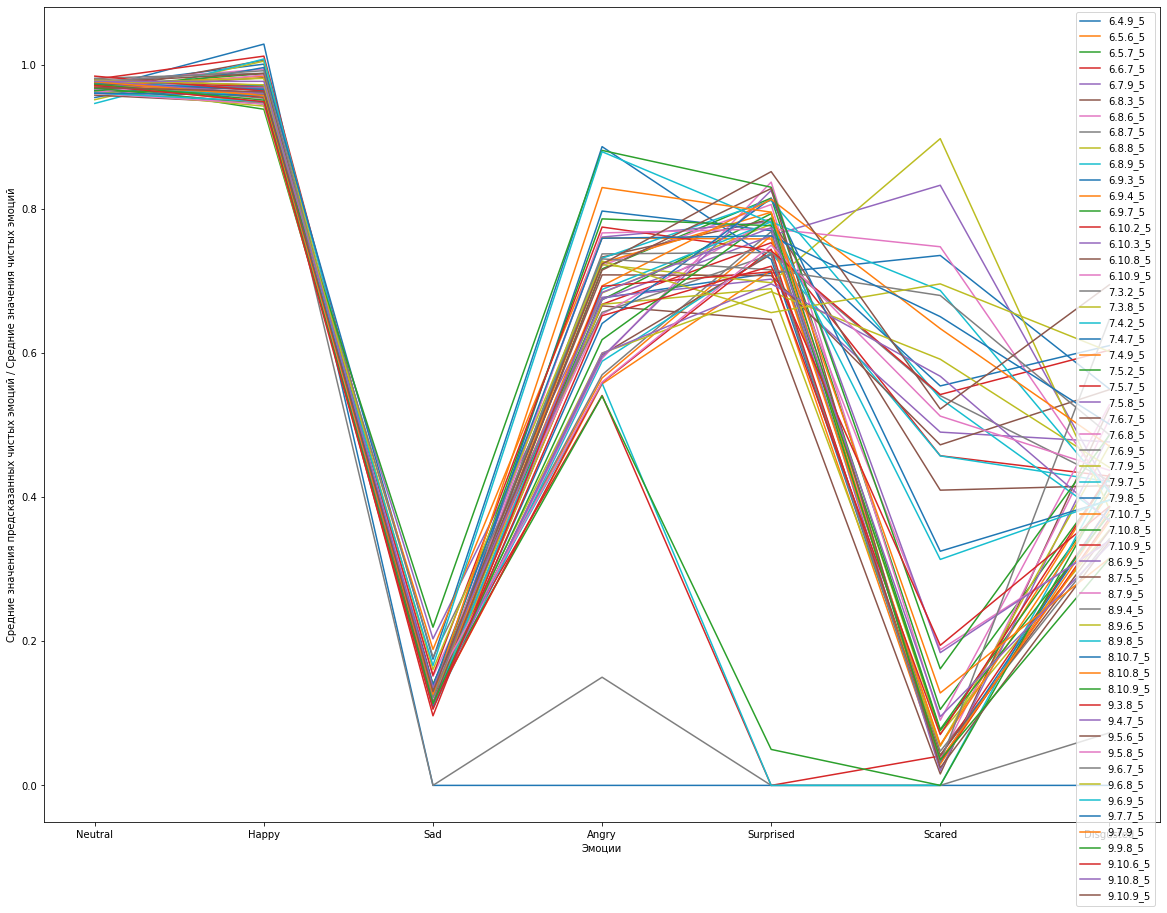

In [116]:
kwargs = {
    'models': models_5, 
    'df_clear': df_clear, 
    'df_clear_metrics': df_clear_metrics_5,
    'scale': True
}
df_clear_metrics_5 = tools.plot_emotions(**kwargs)

In [116]:
df_clear_metrics_5.sort_values('clear')[-15:]

model   Neutral     Happy       Sad     Angry  Surprised    Scared  \
27   7.6.9_5  0.981148  0.947506  0.123479  0.737935   0.739956  0.541097   
35   8.7.5_5  0.974431  0.965403  0.127508  0.708804   0.707807  0.472835   
29   7.9.7_5  0.978607  0.965126  0.123230  0.731981   0.812267  0.537217   
39   8.9.8_5  0.972358  0.957169  0.110917  0.688540   0.782329  0.687190   
41  8.10.8_5  0.971953  0.959429  0.124520  0.693539   0.813634  0.634177   
47   9.6.7_5  0.977057  0.992254  0.121903  0.731005   0.715813  0.680193   
24   7.5.8_5  0.964171  0.960848  0.116048  0.674665   0.763085  0.833248   
50   9.7.7_5  0.961030  0.958326  0.138591  0.759689   0.762949  0.650786   
28   7.7.9_5  0.963894  0.943114  0.130847  0.722955   0.697878  0.897929   
36   8.7.9_5  0.961901  0.986443  0.111921  0.767032   0.772687  0.747835   
0    6.4.9_5  0.971641  1.001391  0.114867  0.676665   0.711228  0.735773   
33  7.10.9_5  0.978962  0.969324  0.152829  0.775196   0.742370  0.542658   
30   7.9.8_5  0.964601  0.972142  0.109812  0.797408   0.770251  0.554589   
48   9.6.8_5  0.978957  0.972636  0.160663  0.727973   0.656422  0.696296   
55  9.10.9_5  0.969231  0.963061  0.130155  0.723731   0.852134  0.522503   

    Disgusted     clear  
27   0.423116  0.642034  
35   0.549399  0.643741  
29   0.368446  0.645268  
39   0.407857  0.658052  
41   0.471098  0.666907  
47   0.486725  0.672136  
24   0.410142  0.674601  
50   0.501568  0.676134  
28   0.383871  0.677213  
36   0.407031  0.679264  
0    0.550502  0.680295  
33   0.604257  0.680799  
30   0.610625  0.682775  
48   0.602264  0.685030  
55   0.695056  0.693696

### Сохранение df_clear_metrics с помощью tools.save_to_db

In [117]:
name_db = 'df_clear_metrics'
dir_metric = 'model_metrics'
path_dir_metric = os.path.join(project_dir_path, dir_metric, layer, f'_{v}')
db_path = os.path.join(path_dir_metric, f'{name_db}_{v}.db')
db_path

'/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/model_metrics/third/_5/df_clear_metrics_5.db'

In [119]:
tools.save_to_db(db_path, name_db, df_clear_metrics_5)

In [120]:
connection = sqlite3.connect(db_path)
pd.read_sql(f'select * from {name_db}', con=connection)

model            Neutral              Happy                   Sad  \
0    6.4.9_5  0.971640876712398   1.00139074765591      0.11486683023146   
1    6.5.6_5  0.976314652231329  0.959555077756126     0.131623848398967   
2    6.5.7_5  0.978511835901463  0.959655765681097     0.109976721357808   
3    6.6.7_5  0.978981652875948  0.972084239982239     0.110458844767886   
4    6.7.9_5  0.968838521572346  0.961071066436167     0.203468724967183   
5    6.8.3_5  0.963350489908979   1.00688765665751     0.140017693753099   
6    6.8.6_5  0.963072663400825  0.947956676011844     0.131502819561921   
7    6.8.7_5  0.974944499736661  0.953972795821373     0.131662968079753   
8    6.8.8_5  0.971616543319961  0.970011697982297     0.122453692692395   
9    6.8.9_5   0.97175615615907  0.967332291285058     0.107350958461051   
10   6.9.3_5  0.966695966368234   1.02918211386184  2.33205737693164e-10   
11   6.9.4_5  0.975214782893159  0.955967329118279     0.112336572914985   
12   6.9.7_5   0.97495167808743  0.938744610674449     0.139825260960357   
13  6.10.2_5   0.98038368211471   1.01249072787904     0.134773036426674   
14  6.10.3_5  0.972988581652543  0.965978120156928     0.127196894064191   
15  6.10.8_5  0.966726687276186  0.982588629948866     0.115022532016086   
16  6.10.9_5  0.976266776281708  0.994474497348194     0.112996292898281   
17   7.3.2_5  0.981743979585441  0.988706415236035  1.42183450292586e-07   
18   7.3.8_5  0.952005958187261   1.00555896706897      0.11117990156739   
19   7.4.2_5  0.946830610616715   1.00859329055546     0.134131351335302   
20   7.4.7_5  0.955055601427959  0.996674121195186     0.175136984244768   
21   7.4.9_5  0.975575282102119  0.947394127035568     0.188737441733975   
22   7.5.2_5  0.970237448303572   0.98822721891739     0.123310366589369   
23   7.5.7_5  0.975761310887303  0.955409081373751     0.112685517492083   
24   7.5.8_5  0.964170829401524  0.960848249597672     0.116047851162743   
25   7.6.7_5   0.95833300522187  0.946938131300281     0.130078666467107   
26   7.6.8_5  0.966581599423778  0.947171245026896     0.151267680804439   
27   7.6.9_5  0.981147993971168  0.947506415252218     0.123478962247232   
28   7.7.9_5  0.963893732895143  0.943114010426921     0.130846711516191   
29   7.9.7_5  0.978607222799818  0.965126476271158     0.123230474167127   
30   7.9.8_5  0.964600922112855  0.972142111100281     0.109812183963894   
31  7.10.7_5  0.970825099730934  0.984766226275703     0.112391487590485   
32  7.10.8_5  0.964573972880731  0.960897322741687       0.1311646529404   
33  7.10.9_5  0.978961821161112  0.969323891923956     0.152829442934831   
34   8.6.9_5  0.971825323827073  0.968932219154329      0.11492706776232   
35   8.7.5_5  0.974430639321864  0.965403188846838     0.127508041409041   
36   8.7.9_5  0.961901132221927  0.986443315635696     0.111921448053913   
37   8.9.4_5  0.980902409207994  0.966379633623428     0.178051644289739   
38   8.9.6_5  0.974756280946157  0.981573408916381     0.126492177769424   
39   8.9.8_5  0.972358285954933  0.957169197540483     0.110917238492029   
40  8.10.7_5  0.975323553157354  0.966177084710284     0.110733980186012   
41  8.10.8_5  0.971952769969964  0.959428973461746     0.124519902817232   
42  8.10.9_5  0.968066970531637  0.945905835681167     0.219619259970313   
43   9.3.8_5  0.984723481822437  0.963962667232891    0.0966058078734131   
44   9.4.7_5  0.978010142182885  0.960385867184944     0.112927376798896   
45   9.5.6_5  0.976216466992844  0.988425922790033     0.113958787474126   
46   9.5.8_5  0.960777172825244  0.946121223119372     0.136584666942832   
47   9.6.7_5  0.977057489868961  0.992253758363538     0.121903000325673   
48   9.6.8_5  0.978957380316992  0.972635775198437     0.160663396639605   
49   9.6.9_5  0.961185487150343  0.949551976798479     0.166408427165919   
50   9.7.7_5  0.961029631771781  0.958325837859173     0.138591350352896   
51   9.7.9_5  0.976766949163259  0.957804932626624     